Lets Begin Coding
1. Download and Install required modules and libraries
2. Import required data and connect with drive


In [ ]:

!pip install lpips
!pip install bcolz #bcolz 1.2.0
!pip install torch torchvision
#!pip install mxnet-cu90 #optional, for data processing MXNet 1.3.1
!pip install focal-loss-torch
!pip install split-folders # Used for split folders into train and val datasets or in our case split data into gallery and probe
!pip install PTable
#https://torchmetrics.readthedocs.io/en/latest/image/learned_perceptual_image_patch_similarity.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 KB 6.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bcolz: filename=bcolz-1.2.1-cp38-cp38-linux_x86_64.whl size=2883635 sha256=9e06f1f3ffba20a6c610d39e34e49b8a1a40fbef1abb2bec2889b50bbd35df10
  Stored in directory: /root/.cache/pip/wheels/c8/f3/3b/5cf5f3997e4729700f17eb4faa8eb7dde1a209cdea66371b7a
Successfully built bcolz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in in

In [ ]:
import torch
from PIL import Image
import numpy as np
import lpips
import torchvision.transforms as transforms
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
# used to supress display of warnings
import warnings
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

#from tensorboardX import SummaryWriter
from tqdm import tqdm

#4
import cv2
import torchvision.datasets as datasets
import torch.nn.functional as F
from tqdm import tqdm

#5
import torch.utils.data as data
import torch.nn.functional as F

#66
from easydict import EasyDict as edict
from pathlib import Path
from torch.nn import CrossEntropyLoss
from torchvision import transforms as trans
from torch.utils.data import Dataset, ConcatDataset, DataLoader
from torchvision import transforms as trans
from torchvision.datasets import ImageFolder
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
import cv2
import bcolz
import pickle


import splitfolders
from torch import nn, optim, as_tensor
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.nn.init import *
from torchvision import transforms, utils, datasets, models
import cv2
from PIL import Image
from pdb import set_trace
import time
import copy
from pathlib import Path
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import io, transform
from tqdm import trange, tqdm
import csv
import glob
import dlib
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Lowkey code/supp_material'

/content/drive/.shortcut-targets-by-id/1zwzhRkZ80H2xZrn02Z1yt-rw_JDFgkmX/Lowkey code/supp_material


In [ ]:
%ls

 align/               imgattacked2.png         pnet.npy
 attack1.png          imgattacked.png          requirements.txt
 attack_dir_warp.py   imgattackshalwar.JPG     rnet.npy
 backbone/           'Lowkey test run.ipynb'   util/
 face/                models/
 flagged/             onet.npy


In [ ]:
#convert to tensor
to_tensor = transforms.ToTensor()

A little info about folders
1. Align,util, models and backbone are imported from lowkey. Align is a copy of similar folder from FaceEvolve.
2. Face is a clone of complete repository of FaceEvolve.

In [ ]:
import os
import sys
import math
import numbers

In [ ]:
from util.prepare_utils import prepare_models,prepare_dir_vec,get_ensemble,extract_features # Used to load attack backbone in code
from util.feature_extraction_utils import normalize_transforms,feature_extractor
from util.attack_utils import Attack
from align.detector import detect_faces
from align.align_trans import get_reference_facial_points,warp_and_crop_face
from backbone.model_irse import IR_152
import lpips
from face.applications.align.visualization_utils import show_results

#1

from face.head.metrics import ArcFace,CosFace,SphereFace
from face.util.utils import make_weights_for_balanced_classes, get_val_data,separate_irse_bn_paras, separate_resnet_bn_paras, warm_up_lr, schedule_lr, perform_val, get_time, buffer_val, AverageMeter, accuracy

#2

from backbone.model_irse import IR_50, IR_101, IR_152, IR_SE_50, IR_SE_101, IR_SE_152
from backbone.model_resnet import ResNet_50, ResNet_101, ResNet_152

from face.loss.focal import FocalLoss

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [ ]:
device

device(type='cuda')

 Parameters for lowkey adversial Attack

In [ ]:
# Parameters for lowkey adversial Attack
eps = 0.05
n_iters = 50 # No of epooch for the attack
input_size = [112, 112] # Input size model expects
attack_type = 'lpips' # attack type used
c_tv = None
c_sim = 0.05
lr = 0.0025 # the learning rate to optimize attack on
net_type = 'alex'
noise_size = 0.005 # noise size used
n_starts = 1
kernel_size_gf = 7 # gaussian smoothing window
sigma_gf = 3 # sigma for gaussain smoothing
combination = True # A switch to use gaussain smoothing together in attack or not
using_subspace = False
V_reduction_root = './'
direction = 1
crop_size = 112
scale = crop_size / 112 #1


Parameters for training by Face Evolve.

In [ ]:

EMBEDDING_SIZE = 512 # feature dimension
BATCH_SIZE = 512
DROP_LAST = True # whether drop the last batch to ensure consistent batch_norm statistics
LR = 0.1 # initial LR
NUM_EPOCH = 120 # total epoch number (use the firt 1/25 epochs to warm up)
WEIGHT_DECAY = 5e-4 # do not apply to batch_norm parameters
MOMENTUM = 0.9
STAGES = [35, 65, 95] # epoch stages to decay learning rate
HEAD_NAME = 'ArcFace' # support:  ['Softmax', 'ArcFace', 'CosFace', 'SphereFace', 'Am_softmax']
LOSS_NAME = 'Focal' # support: ['Focal', 'Softmax']

#INPUT_SIZE = [112, 112] # support: [112, 112] and [224, 224]
RGB_MEAN = [0.5, 0.5, 0.5] # for normalize inputs to [-1, 1]

#DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MULTI_GPU = True # flag to use multiple GPUs; if you choose to train with single GPU, you should first run "export CUDA_VISILE_DEVICES=device_id" to specify the GPU card you want to use
GPU_ID = [0] # specify your GPU ids
PIN_MEMORY = True
NUM_WORKERS = 0

RGB_MEAN = [0.5, 0.5, 0.5] # for normalize inputs to [-1, 1]
RGB_STD = [0.5, 0.5, 0.5]

### 1. Load all the **Models**

---



In [ ]:
model_backbones = ['IR_152', 'IR_152', 'ResNet_152', 'ResNet_152'] # Model backbone for ensemble
model_roots = ['models/Backbone_IR_152_Arcface_Epoch_112.pth', 'models/Backbone_IR_152_Cosface_Epoch_70.pth', \
'models/Backbone_ResNet_152_Arcface_Epoch_65.pth', 'models/Backbone_ResNet_152_Cosface_Epoch_68.pth'] # Roots of the models


In [ ]:
# Load an IR_152 Cosface model
PATH = 'models/Backbone_IR_152_Cosface_Epoch_70.pth'
IR_152C = IR_152(input_size=input_size)
IR_152C.load_state_dict(torch.load(PATH))

# Load IR_152 Arc Face model
PATH1 = 'models/Backbone_IR_152_Arcface_Epoch_112.pth'
IR_152A = IR_152(input_size=input_size)
IR_152A.load_state_dict(torch.load(PATH1))

#Load ResNet 152 Arc Face Model
PATH2 = 'models/Backbone_ResNet_152_Arcface_Epoch_65.pth'
RESNET_152A = ResNet_152(input_size=input_size)
RESNET_152A.load_state_dict(torch.load(PATH2))


# Load Resnet 152 CosFace Model
PATH3 = 'models/Backbone_ResNet_152_Cosface_Epoch_68.pth'
RESNET_152C = ResNet_152(input_size=input_size)
RESNET_152C.load_state_dict(torch.load(PATH3))



<All keys matched successfully>

In [ ]:
# Generate lowkey ensemble attack model
models_attack, V_reduction, dim = prepare_models(model_backbones,
              input_size,
              model_roots,
              kernel_size_gf,
              sigma_gf,
              combination,
              using_subspace,
              V_reduction_root)

Loading Attack Backbone Checkpoint '['models/Backbone_IR_152_Arcface_Epoch_112.pth', 'models/Backbone_IR_152_Cosface_Epoch_70.pth', 'models/Backbone_ResNet_152_Arcface_Epoch_65.pth', 'models/Backbone_ResNet_152_Cosface_Epoch_68.pth']'


### 2. Now lets perform evaluation on clean data gallery - 24 identities

---





In [ ]:
# define data transform
transform = transforms.Compose([
      transforms.Resize([int(128 * input_size[0] / 112), int(128 * input_size[0] / 112)]),  # smaller side resized
      transforms.CenterCrop([input_size[0], input_size[1]]),
      transforms.ToTensor(),
      transforms.Normalize(mean = RGB_MEAN, std = RGB_STD)])



In [ ]:
#Define Loaders for all different galleries and corresponding probe

# Define the Loader for Clean data gallery and probe and the adversial infected gallery.

gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/gallery' #90% of validation data
probe_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/probe' # 10% of validation data
adversial_gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble' #90% of validation data
#Load Datasetsfor clean gallery and adversial infected gallery

gallery_dataset = datasets.ImageFolder(gallery_root, transform)
probe_dataset = datasets.ImageFolder(probe_root, transform)
adversial_gallery_dataset = datasets.ImageFolder(adversial_gallery_root, transform)
# Define Data Loaders
gallery_loader = torch.utils.data.DataLoader(gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)
probe_loader = torch.utils.data.DataLoader(probe_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)
adversial_loader = torch.utils.data.DataLoader(adversial_gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)

In [ ]:
print(len(gallery_dataset))

1240


In [ ]:
print(len(adversial_gallery_dataset))

1240


In [ ]:
print(len(probe_dataset))

151


In [ ]:
gallery_dataset

Dataset ImageFolder
    Number of datapoints: 1240
    Root location: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/gallery
    StandardTransform
Transform: Compose(
               Resize(size=[128, 128], interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=[112, 112])
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
probe_dataset

Dataset ImageFolder
    Number of datapoints: 151
    Root location: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/probe
    StandardTransform
Transform: Compose(
               Resize(size=[128, 128], interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=[112, 112])
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
adversial_gallery_dataset

Dataset ImageFolder
    Number of datapoints: 1240
    Root location: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble
    StandardTransform
Transform: Compose(
               Resize(size=[128, 128], interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=[112, 112])
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
# Methods to Process features of the data for face recognition
def l2_norm(input, axis = 1):
    norm = torch.norm(input, 2, axis, True)
    output = torch.div(input, norm)

    return output


def de_preprocess(tensor):

    return tensor * 0.5 + 0.5


hflip = transforms.Compose([
            de_preprocess,
            transforms.ToPILImage(),
            transforms.functional.hflip,
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])


def hflip_batch(imgs_tensor):
    hfliped_imgs = torch.empty_like(imgs_tensor)
    for i, img_ten in enumerate(imgs_tensor):
        hfliped_imgs[i] = hflip(img_ten)

    return hfliped_imgs


In [ ]:
# Define a function for feature extractor

def extract_feature_face(loader, model, embedding_size = 512, batch_size = 16, device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"), tta = True):

    NUM_CLASS = len(loader.dataset.classes)
    print("Number of Classes: {}".format(NUM_CLASS))

    model.to(device)

    # extract features
    model.eval() # set to evaluation mode
    idx = 0
    features = np.zeros([len(loader.dataset), embedding_size])
    print("=" * 60)
    print("Features zeros shape: {}".format(features.shape))

    with torch.no_grad():

        iter_loader = iter(loader)
        while idx + batch_size <= len(loader.dataset):
            print("=" * 60)
            print("idx + batch_size <= len(loader.dataset)")
            batch, _ = next(iter_loader)
            features[idx:idx + batch_size] = l2_norm(model(batch.to(device))).cpu()
            print("=" * 60)
            print("Features l2_norm shape else : {}".format(features.shape))
            idx += batch_size
            print("The value of idx is : {}".format(idx))

        if idx < len(loader.dataset):
            batch, _ = next(iter_loader)
            print("=" * 60)
            print("idx<len now")
            features[idx:] = l2_norm(model(batch.to(device)).cpu())
            print("=" * 60)
            print("Features l2_norm else shape : {}".format(features.shape))

    images = []
    labels = []
    for img_path, _ in loader.dataset.samples:
        img = cv2.imread(img_path)
        images.append(img_path)
        label = _
        label = labels.append(label)
    return labels,images, features

In [ ]:
# #Load gallery,probe and labels for IR-152 ArcFace model

gallery_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_IR_152A_features.npy")
gallery_labels_IR_152A =np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_labels_IR_152A.npy")
probe_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_IR_152A_features.npy")
probe_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_labels_IR_152A.npy")

# #Load gallery,probe and labels for IR-152 CosFace model

gallery_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_features_IR_152C.npy")
gallery_labels_IR_152C =np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_labels_IR_152C.npy")
probe_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_features_IR_152C.npy")
probe_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_labels_IR_152C.npy")

# #Load gallery,probe and labels for RESNET-152 ArcFace model

gallery_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_features_RESNET_152A.npy")
gallery_labels_RESNET_152A =np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_labels_RESNET_152A.npy")
probe_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_features_RESNET_152A.npy")
probe_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_labels_RESNET_152A.npy")

# #Load gallery,probe and labels for RESNET-152 CosFace model

gallery_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_features_RESNET_152C.npy")
gallery_labels_RESNET_152C =np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_labels_RESNET_152C.npy")
probe_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_features_RESNET_152C.npy")
probe_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_labels_RESNET_152C.npy")


In [ ]:
from numpy import dot, sqrt

def cosine_similarity(x, y):
    return dot(x, y) / (sqrt(dot(x, x)) * sqrt(dot(y, y)))

### 3. Lets define a function that uses gallery and probe features to compute top1 and top 5 accuracy


---



In [ ]:
import heapq
heapq.nlargest(3,[1,2,3,4,5])

[5, 4, 3]

In [ ]:
gallery_labels_IR_152A[100:120]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
probe_labels_IR_152A[:3]

array([0, 0, 0])

In [ ]:
from numpy import dot, sqrt

def get_best_match(source,target,real_label,all_labels,n=1):
  "takes source feature and target features, along with source label and target labels. Returns TRUE if the label of source exists in top N labels of targets"
  sims=[]
  for val in target:
    cos = cosine_similarity(source,val)
    sims.append(cos) # calculate cosine similarity with all

  vals=heapq.nlargest(n,sims) # n largest similarity values
  indices=[]
  possible_labels=[]
  for val in vals:
    ind=sims.index(val) # index of largest similarity
    indices.append(ind)
    possible_labels.append(all_labels[ind]) # get label corresponding to best matches
  if real_label in possible_labels: # the given value exists in the top N similarities
    return True
  return False

get_best_match(probe_features_IR_152A[11],gallery_features_IR_152A,probe_labels_IR_152A[11],gallery_labels_IR_152A,n=3)

True

In [ ]:
get_best_match(probe_features_IR_152A[100],gallery_features_IR_152A[:99],probe_labels_IR_152A[100],gallery_labels_IR_152A[:99])

False

In [ ]:
# Compute top 1 and top 5 accuracy of model and generate the evaluation table as lowkey here
def get_accuracy(probe_features,probe_labels,gallery_features,gallery_labels,k=1):
  correct=0
  with tqdm(total=len(probe_features)) as pbar:
    for i,val in enumerate(probe_features):
      flag=get_best_match(val,gallery_features,probe_labels[i],gallery_labels,n=k)
      if flag:
        correct+=1
      pbar.update(1)
  accuracy = correct/len(probe_features)

  return  accuracy


In [ ]:
# calculate accuracy for IR_152A
clean_top1_accuracy_IR152A = get_accuracy(probe_features=probe_features_IR_152A,probe_labels=probe_labels_IR_152A,
                                          gallery_features=gallery_features_IR_152A,gallery_labels=gallery_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
clean_top1_accuracy_IR152C = get_accuracy(probe_features=probe_features_IR_152C,probe_labels=probe_labels_IR_152C,
                                          gallery_features=gallery_features_IR_152C,gallery_labels=gallery_labels_IR_152C,k=1)

clean_top1_accuracy_RESNET152A = get_accuracy(probe_features=probe_features_RESNET_152A,probe_labels=probe_labels_RESNET_152A,
                                          gallery_features=gallery_features_RESNET_152A,gallery_labels=gallery_labels_RESNET_152A,k=1)

clean_top1_accuracy_RESNET152C = get_accuracy(probe_features=probe_features_RESNET_152C,probe_labels=probe_labels_RESNET_152C,
                                          gallery_features=gallery_features_RESNET_152C,gallery_labels=gallery_labels_RESNET_152C,k=1)




100%|██████████| 151/151 [00:01<00:00, 94.32it/s]


In [ ]:
# calculate accuracy for IR_152A
clean_top5_accuracy_IR152A = get_accuracy(probe_features=probe_features_IR_152A,probe_labels=probe_labels_IR_152A,
                                          gallery_features=gallery_features_IR_152A,gallery_labels=gallery_labels_IR_152A,k=5)

# calculate accuracy for IR_152C
clean_top5_accuracy_IR152C = get_accuracy(probe_features=probe_features_IR_152C,probe_labels=probe_labels_IR_152C,
                                          gallery_features=gallery_features_IR_152C,gallery_labels=gallery_labels_IR_152C,k=5)

clean_top5_accuracy_RESNET152A = get_accuracy(probe_features=probe_features_RESNET_152A,probe_labels=probe_labels_RESNET_152A,
                                          gallery_features=gallery_features_RESNET_152A,gallery_labels=gallery_labels_RESNET_152A,k=5)

clean_top5_accuracy_RESNET152C = get_accuracy(probe_features=probe_features_RESNET_152C,probe_labels=probe_labels_RESNET_152C,
                                          gallery_features=gallery_features_RESNET_152C,gallery_labels=gallery_labels_RESNET_152C,k=5)




100%|██████████| 151/151 [00:01<00:00, 94.93it/s]


In [ ]:
print("The top1 Accuracy on clean images for IR_152A is: {}".format(clean_top1_accuracy_IR152A))
print("The top1 Accuracy on clean images for IR_152C is: {}".format(clean_top1_accuracy_IR152C))
print("The top1 Accuracy on clean images for RESNET_152A is: {}".format(clean_top1_accuracy_RESNET152A))
print("The top1 Accuracy on clean images for RESNET_152C is: {}".format(clean_top1_accuracy_RESNET152C))


The top1 Accuracy on clean images for IR_152A is: 0.9933774834437086
The top1 Accuracy on clean images for IR_152C is: 0.9933774834437086
The top1 Accuracy on clean images for RESNET_152A is: 0.9933774834437086
The top1 Accuracy on clean images for RESNET_152C is: 0.9933774834437086


In [ ]:
print("The top5 Accuracy on clean images for IR_152A is: {}".format(clean_top5_accuracy_IR152A))
print("The top5 Accuracy on clean images for IR_152C is: {}".format(clean_top5_accuracy_IR152C))
print("The top5 Accuracy on clean images for RESNET_152A is: {}".format(clean_top5_accuracy_RESNET152A))
print("The top5 Accuracy on clean images for RESNET_152C is: {}".format(clean_top5_accuracy_RESNET152C))


The top5 Accuracy on clean images for IR_152A is: 0.9933774834437086
The top5 Accuracy on clean images for IR_152C is: 0.9933774834437086
The top5 Accuracy on clean images for RESNET_152A is: 0.9933774834437086
The top5 Accuracy on clean images for RESNET_152C is: 1.0


### 4. Now Lets perform the attack on 5 identities and insert them back to gallery to create adversial gallery


---




In [ ]:
# Function to protect a single image

def protect_image(image):
  #img = Image.fromarray(img)
  img = Image.open(image)
  #print(img)
  reference = get_reference_facial_points(default_square=True) * scale
  print("The value for reference in get reference facial points  is {}".format(reference))
  h,w,c = np.array(img).shape
  print (h,w,c)

  b_box,landmarks = detect_faces(img)
  #show_results(img, _, landmarks)
  print("The size of landmarks is {}".format(landmarks.size))
  #print("The value for _ in detect faces is {}".format(_))
  # (landmarks)
  facial5points = [[landmarks[0][j], landmarks[0][j + 5]] for j in range(5)]
  #print("The value for _ in detect faces is {} end ".format(facial5points))
  b_box, tfm = warp_and_crop_face(np.array(img), facial5points, reference, crop_size=(crop_size, crop_size))
  print("The value for tfm in warp_and_crop_face is {}  ".format(tfm))
  # pytorch transform
  theta = normalize_transforms(tfm, w, h)
  tensor_img = to_tensor(img).unsqueeze(0).to(device)
  print("The value for theta in normalize_transforms(tfm, w, h) is {}  ".format(theta))
  V_reduction = None
  dim = 512

  # Find gradient direction vector
  dir_vec_extractor = get_ensemble(models = models_attack, sigma_gf=None, kernel_size_gf=None, combination=False, V_reduction=V_reduction, warp=True, theta_warp=theta)
  dir_vec = prepare_dir_vec(dir_vec_extractor, tensor_img, dim, combination)
  print("The value for direction vector of gradient in image is {}  ".format(dir_vec))
  img_attacked = tensor_img.clone()
  attack = Attack(models_attack, dim, attack_type,
                  eps, c_sim, net_type, lr, n_iters,
                  noise_size, n_starts, c_tv, sigma_gf,
                  kernel_size_gf, combination, warp=True,
                  theta_warp=theta, V_reduction=V_reduction)
  img_attacked = attack.execute(tensor_img, dir_vec, direction).detach().cpu()

  img_attacked_pil = transforms.ToPILImage()(img_attacked[0])
  return img_attacked_pil,dir_vec_extractor


In [ ]:
#Now lets create a  function to attack a directory of images  with lowkey attack

def protect_dir(dirs_root,model,save_dir):

  for img_name in tqdm(os.listdir(dirs_root)):


    img_root = os.path.join(dirs_root, img_name)
    #new_img_root = os.path.join(save_dir, img_name)
    print("The image processed is : {}".format(img_root))
    print('Finding reference points')
    reference = get_reference_facial_points(default_square=True) * scale
    img = Image.open(img_root)
    #h,w,c = np.array(img).shape
    h,w,c = np.array(img).shape
    #print("The value for reference in get reference facial points  is {}".format(reference))
    #print (h,w,c)
    ## Detects facial points ##
    b_box,landmarks = detect_faces(img)
    facial5points = [[landmarks[0][j], landmarks[0][j + 5]] for j in range(5)]
    #print("The value for _ in detect faces is {} end ".format(facial5points))
    b_box, tfm = warp_and_crop_face(np.array(img), facial5points, reference, crop_size=(crop_size, crop_size))
    #print("The value for tfm in warp_and_crop_face is {}  ".format(tfm))

    ## find pytorch transform
    theta = normalize_transforms(tfm, w, h)
    tensor_img = to_tensor(img).unsqueeze(0).to(device)
    #print("The value for theta in normalize_transforms(tfm, w, h) is {}  ".format(theta))

    V_reduction = None
    dim = 512

  # Find gradient direction vector i.e find the feature vector extractor
    dir_vec_extractor = get_ensemble(models=model, sigma_gf=None, kernel_size_gf=None, combination=False, V_reduction=V_reduction, warp=True, theta_warp=theta)
    dir_vec = prepare_dir_vec(dir_vec_extractor, tensor_img, dim, combination).to(device)
  #print("The value for direction vector of gradient in image is {}  ".format(dir_vec))

  # Perform Low key attack
    img_attacked = tensor_img.clone()
    attack = Attack(model, dim, attack_type,
                  eps, c_sim, net_type, lr, n_iters,
                  noise_size, n_starts, c_tv, sigma_gf,
                  kernel_size_gf, combination, warp=True,
                  theta_warp=theta, V_reduction=V_reduction).to(device)
    img_attacked = attack.execute(tensor_img, dir_vec, direction).detach().cpu()
    print("attack Executed")
    img_attacked_pil = transforms.ToPILImage()(img_attacked[0])
    img_attacked_pil.save(img_root[:-4] + 'protected.png')


In [ ]:
# Now onto adversial attack on some identities
lowkey_id_1 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Adam_Brody"
lowkey_id_2 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/AndyGarcia"
lowkey_id_3 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis"
lowkey_id_4 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck"
lowkey_id_5 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina"



In [ ]:
# protect_dir(dirs_root=lowkey_id_3,model=models_attack)


  0%|          | 0/58 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5918_3439.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/58 [00:36<34:26, 36.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5896_3424.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/58 [01:13<34:32, 37.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5956_3451.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▌         | 3/58 [01:51<34:04, 37.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5908_3432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 4/58 [02:27<33:06, 36.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5875_3412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 5/58 [03:03<32:24, 36.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5914_3436.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 6/58 [03:39<31:27, 36.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5904_3430.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 7/58 [04:16<30:58, 36.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5911_3435.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 8/58 [04:52<30:16, 36.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5871_3411.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 9/58 [05:29<29:47, 36.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5974_3459.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 10/58 [06:06<29:28, 36.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5793_3359.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 11/58 [06:43<28:48, 36.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5935_3444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██        | 12/58 [07:21<28:26, 37.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5880_3415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 13/58 [07:58<27:52, 37.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5903_3429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 14/58 [08:35<27:15, 37.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5844_3393.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 15/58 [09:12<26:39, 37.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5700_3317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 16/58 [09:50<26:11, 37.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5726_3329.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 17/58 [10:28<25:35, 37.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5936_3445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███       | 18/58 [11:06<25:00, 37.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5751_3340.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 19/58 [11:43<24:23, 37.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5740_3336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 20/58 [12:22<24:01, 37.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5762_3345.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 21/58 [12:59<23:14, 37.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5869_3410.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 22/58 [13:36<22:32, 37.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5737_3334.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|███▉      | 23/58 [14:14<21:54, 37.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5725_3328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████▏     | 24/58 [14:51<21:15, 37.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5782_3354.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 25/58 [15:28<20:32, 37.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5738_3335.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▍     | 26/58 [16:06<19:58, 37.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5689_3311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 27/58 [16:44<19:23, 37.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5790_3356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 28/58 [17:20<18:35, 37.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5664_3295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 29/58 [17:57<17:55, 37.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5701_3318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 30/58 [18:35<17:24, 37.29s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5720_3327.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 31/58 [19:13<16:51, 37.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5772_3349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▌    | 32/58 [19:49<16:06, 37.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5707_3321.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 33/58 [20:27<15:33, 37.33s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5792_3358.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▊    | 34/58 [21:05<14:59, 37.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5813_3374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 35/58 [21:41<14:16, 37.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5688_3310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 36/58 [22:19<13:39, 37.23s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5697_3315.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 37/58 [22:57<13:09, 37.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5657_3291.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 38/58 [23:34<12:27, 37.37s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5640_3278.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 39/58 [24:11<11:46, 37.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5656_3290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 40/58 [24:48<11:11, 37.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5635_3274.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 41/58 [25:25<10:31, 37.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5651_3286.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 42/58 [26:02<09:51, 36.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5639_3277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 43/58 [26:38<09:13, 36.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5666_3296.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 44/58 [27:17<08:44, 37.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5685_3308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 45/58 [27:54<08:04, 37.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5634_3273.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 79%|███████▉  | 46/58 [28:30<07:24, 37.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5677_3304.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 47/58 [29:08<06:50, 37.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5648_3283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 48/58 [29:46<06:13, 37.37s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5641_3279.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 49/58 [30:23<05:34, 37.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5652_3287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 50/58 [31:00<04:58, 37.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5918_3439.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 51/58 [31:37<04:19, 37.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5896_3424.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 52/58 [32:13<03:41, 36.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5956_3451.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 53/58 [32:49<03:02, 36.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5908_3432.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 54/58 [33:26<02:27, 36.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5875_3412.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▍| 55/58 [34:02<01:49, 36.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5914_3436.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 56/58 [34:38<01:12, 36.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5904_3430.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 57/58 [35:15<00:36, 36.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Andy_Serkis/Andy_Serkis_5911_3435.protected.png
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 58/58 [35:51<00:00, 37.10s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=lowkey_id_4,model=models_attack)


  0%|          | 0/27 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8549_4727.jpeg
Finding reference points


/content/drive/MyDrive/Lowkey code/supp_material/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:102: UserWarning: volatile was remov

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▎         | 1/27 [00:51<22:28, 51.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8779_4882.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 2/27 [01:29<18:04, 43.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8681_4815.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 11%|█         | 3/27 [02:07<16:27, 41.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8572_4742.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 15%|█▍        | 4/27 [02:43<15:00, 39.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8518_4699.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▊        | 5/27 [03:20<13:58, 38.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8479_4675.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 6/27 [03:56<13:05, 37.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8539_4718.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 7/27 [04:32<12:20, 37.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8486_4681.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|██▉       | 8/27 [05:11<11:55, 37.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8586_4750.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 9/27 [05:47<11:08, 37.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8525_4705.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 37%|███▋      | 10/27 [06:23<10:25, 36.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8617_4771.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 11/27 [06:59<09:44, 36.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8480_4676.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 12/27 [07:37<09:15, 37.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8557_4733.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 13/27 [08:13<08:34, 36.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8519_4700.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 14/27 [08:49<07:55, 36.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8496_4684.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 15/27 [09:25<07:16, 36.39s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8526_4706.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 16/27 [10:03<06:46, 36.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8462_4663.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 63%|██████▎   | 17/27 [10:39<06:05, 36.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8607_4765.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 18/27 [11:15<05:27, 36.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8456_4657.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 19/27 [11:51<04:49, 36.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8603_4762.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 20/27 [12:26<04:11, 35.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8556_4732.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 21/27 [13:03<03:38, 36.35s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8477_4673.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████▏ | 22/27 [13:39<03:00, 36.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8563_4737.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 85%|████████▌ | 23/27 [14:14<02:23, 35.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8471_4670.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 89%|████████▉ | 24/27 [14:50<01:47, 35.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8455_4656.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 25/27 [15:27<01:12, 36.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8461_4662.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▋| 26/27 [16:03<00:36, 36.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Ben_Affleck/Ben_Affleck_8476_4672.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 27/27 [16:38<00:00, 37.00s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=lowkey_id_5,model=models_attack)


  0%|          | 0/17 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_4109_2483.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 1/17 [00:35<09:27, 35.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3944_2366.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 2/17 [01:12<09:08, 36.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3938_2360.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 3/17 [01:48<08:25, 36.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_4002_2412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▎       | 4/17 [02:23<07:46, 35.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3977_2392.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 5/17 [02:59<07:08, 35.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3939_2361.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▌      | 6/17 [03:34<06:31, 35.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_4009_2417.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 7/17 [04:12<06:01, 36.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_4096_2477.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 8/17 [04:47<05:23, 35.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3942_2364.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 9/17 [05:22<04:45, 35.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3975_2390.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 10/17 [05:58<04:09, 35.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3943_2365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▍   | 11/17 [06:36<03:37, 36.32s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3971_2387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 12/17 [07:12<03:01, 36.30s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3947_2369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▋  | 13/17 [07:48<02:24, 36.24s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3957_2376.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 14/17 [08:24<01:48, 36.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3940_2362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 15/17 [09:01<01:13, 36.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3994_2404.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 16/17 [09:38<00:36, 36.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Alfred_Molina/Alfred_Molina_3952_2372.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 17/17 [10:14<00:00, 36.17s/it]

attack Executed


In [ ]:
# # from matplotlib.patches import Arc
# # Extract adversial gallery features for IR_152A
# adversial_labels_IR_152A,adversial_images_IR_152A,adversial_features_IR_152A = extract_feature_face(loader=adversial_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)

# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_IR_152A.npy", adversial_features_IR_152A)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_IR_152A.npy", adversial_labels_IR_152A)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_images_IR_152A.npy", adversial_images_IR_152A)

# #Extract adversial gallery features for IR_152C
# adversial_labels_IR_152C,adversial_images_IR_152C,adversial_features_IR_152C = extract_feature_face(loader=adversial_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)

# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_IR_152C.npy", adversial_features_IR_152C)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_IR_152C.npy", adversial_labels_IR_152C)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_images_IR_152C.npy", adversial_images_IR_152C)


# #Extract adversial gallery features for  RESNET_152A
# adversial_labels_RESNET_152A,adversial_images_RESNET_152A,adversial_features_RESNET_152A = extract_feature_face(loader=adversial_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)

# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_RESNET_152A.npy", adversial_features_RESNET_152A)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_RESNET_152A.npy", adversial_labels_RESNET_152A)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_images_RESNET_152A.npy", adversial_images_RESNET_152A)

# #Extract adversial gallery features for RESNET_152C
# adversial_labels_RESNET_152C,adversial_images_RESNET_152C,adversial_features_RESNET_152C = extract_feature_face(loader=adversial_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)

# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_RESNET_152C.npy", adversial_features_RESNET_152C)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_RESNET_152C.npy", adversial_labels_RESNET_152C)
# np.save("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_images_RESNET_152C.npy", adversial_images_RESNET_152C)


Number of Classes: 24
Features zeros shape: (1240, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 32
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 48
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 64
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 80
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 96
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 112
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 128
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The 

In [ ]:
adversial_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_IR_152A.npy")
adversial_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_IR_152A.npy")

adversial_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_IR_152C.npy")
adversial_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_IR_152C.npy")

adversial_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_RESNET_152A.npy")
adversial_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_RESNET_152A.npy")

adversial_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_features_RESNET_152C.npy")
adversial_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_labels_RESNET_152C.npy")


In [ ]:
type(gallery_features_IR_152A)

numpy.ndarray

In [ ]:
type(probe_features_IR_152A)

numpy.ndarray

In [ ]:
type(adversial_features_IR_152A)

numpy.ndarray

In [ ]:
# calculate accuracy for IR_152A
adversial_top1_accuracy_IR152A = get_accuracy(probe_features=probe_features_IR_152A,probe_labels=probe_labels_IR_152A,
                                          gallery_features=adversial_features_IR_152A,gallery_labels=adversial_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
adversial_top1_accuracy_IR152C = get_accuracy(probe_features=probe_features_IR_152C,probe_labels=probe_labels_IR_152C,
                                          gallery_features=adversial_features_IR_152C,gallery_labels=adversial_labels_IR_152C,k=1)

adversial_top1_accuracy_RESNET152A = get_accuracy(probe_features=probe_features_RESNET_152A,probe_labels=probe_labels_RESNET_152A,
                                          gallery_features=adversial_features_RESNET_152A,gallery_labels=adversial_labels_RESNET_152A,k=1)

adversial_top1_accuracy_RESNET152C = get_accuracy(probe_features=probe_features_RESNET_152C,probe_labels=probe_labels_RESNET_152C,
                                          gallery_features=adversial_features_RESNET_152C,gallery_labels=adversial_labels_RESNET_152C,k=1)



100%|██████████| 151/151 [00:01<00:00, 92.87it/s]


In [ ]:
# calculate accuracy for IR_152A
adversial_top5_accuracy_IR152A = get_accuracy(probe_features=probe_features_IR_152A,probe_labels=probe_labels_IR_152A,
                                          gallery_features=adversial_features_IR_152A,gallery_labels=adversial_labels_IR_152A,k=5)

# calculate accuracy for IR_152C
adversial_top5_accuracy_IR152C = get_accuracy(probe_features=probe_features_IR_152C,probe_labels=probe_labels_IR_152C,
                                          gallery_features=adversial_features_IR_152C,gallery_labels=adversial_labels_IR_152C,k=5)

adversial_top5_accuracy_RESNET152A = get_accuracy(probe_features=probe_features_RESNET_152A,probe_labels=probe_labels_RESNET_152A,
                                          gallery_features=adversial_features_RESNET_152A,gallery_labels=adversial_labels_RESNET_152A,k=5)

adversial_top5_accuracy_RESNET152C = get_accuracy(probe_features=probe_features_RESNET_152C,probe_labels=probe_labels_RESNET_152C,
                                          gallery_features=adversial_features_RESNET_152C,gallery_labels=adversial_labels_RESNET_152C,k=5)



100%|██████████| 151/151 [00:01<00:00, 89.78it/s]


In [ ]:
print("The top1 Accuracy on adversial images for IR_152A is: {}".format(adversial_top1_accuracy_IR152A))
print("The top1 Accuracy on adversial images for IR_152C is: {}".format(adversial_top1_accuracy_IR152C))
print("The top1 Accuracy on adversial images for RESNET_152A is: {}".format(adversial_top1_accuracy_RESNET152A))
print("The top1 Accuracy on adversial images for RESNET_152C is: {}".format(adversial_top1_accuracy_RESNET152C))


The top1 Accuracy on adversial images for IR_152A is: 0.7880794701986755
The top1 Accuracy on adversial images for IR_152C is: 0.7947019867549668
The top1 Accuracy on adversial images for RESNET_152A is: 0.7947019867549668
The top1 Accuracy on adversial images for RESNET_152C is: 0.7947019867549668


In [ ]:
print("The top5 Accuracy on adversial images for IR_152A is: {}".format(adversial_top5_accuracy_IR152A))
print("The top5 Accuracy on adversial images for IR_152C is: {}".format(adversial_top5_accuracy_IR152C))
print("The top5 Accuracy on adversial images for RESNET_152A is: {}".format(adversial_top5_accuracy_RESNET152A))
print("The top5 Accuracy on adversial images for RESNET_152C is: {}".format(adversial_top5_accuracy_RESNET152C))


The top5 Accuracy on adversial images for IR_152A is: 0.7947019867549668
The top5 Accuracy on adversial images for IR_152C is: 0.7947019867549668
The top5 Accuracy on adversial images for RESNET_152A is: 0.7947019867549668
The top5 Accuracy on adversial images for RESNET_152C is: 0.8013245033112583


In [ ]:
gallery_images_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/gallery1_features/gallery_images_IR_152A.npy")
probe_images_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/probe1_features/probe_images_IR_152A.npy")
adversial_images_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/adversial1_features/adversial_images_IR_152A.npy")

In [ ]:
print("img 1 is: {} ".format(gallery_images_IR_152A[0]))
print("img 2 is: {} ".format(probe_images_IR_152A[1]))

score_IR152A = cosine_similarity(gallery_features_IR_152A[0],probe_features_IR_152A[1])
print("IR_152 ArcFace score is : {}".format(score_IR152A))

score_IR152C = cosine_similarity(gallery_features_IR_152C[0],probe_features_IR_152C[1])
print("IR_152 CosFace score is : {}".format(score_IR152C))

score_RES152A = cosine_similarity(gallery_features_RESNET_152A[0],probe_features_RESNET_152A[1])
print("RESNET_152 ArcFace score is : {}".format(score_RES152A))

score_RES152C = cosine_similarity(gallery_features_RESNET_152C[0],probe_features_RESNET_152C[1])
print("RESNET_152 CosFace score is : {}".format(score_RES152C))

img 1 is: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/gallery/Aaron_Eckhart/Aaron_Eckhart_105_83.jpeg 
img 2 is: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/probe/Aaron_Eckhart/Aaron_Eckhart_257_176.jpeg 
IR_152 ArcFace score is : 0.7413190771717567
IR_152 CosFace score is : 0.6754996214791376
RESNET_152 ArcFace score is : 0.7050748316227949
RESNET_152 CosFace score is : 0.7014041057537382


In [ ]:
print("img 1 is: {} ".format(adversial_images_IR_152A[0]))
print("img 2 is: {} ".format(probe_images_IR_152A[1]))

score_IR152A = cosine_similarity(adversial_features_IR_152A[0],probe_features_IR_152A[1])
print("IR_152 ArcFace score is : {}".format(score_IR152A))

score_IR152C = cosine_similarity(adversial_features_IR_152C[0],probe_features_IR_152C[1])
print("IR_152 CosFace score is : {}".format(score_IR152C))

score_RES152A = cosine_similarity(adversial_features_RESNET_152A[0],probe_features_RESNET_152A[1])
print("RESNET_152 ArcFace score is : {}".format(score_RES152A))

score_RES152C = cosine_similarity(adversial_features_RESNET_152C[0],probe_features_RESNET_152C[1])
print("RESNET_152 CosFace score is : {}".format(score_RES152C))

img 1 is: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_galleries/adversial_gallery_ensemble/Aaron_Eckhart/Aaron_Eckhart_105_83.jpeg 
img 2 is: /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/probe/Aaron_Eckhart/Aaron_Eckhart_257_176.jpeg 
IR_152 ArcFace score is : 0.7413190771717567
IR_152 CosFace score is : 0.6754996214791376
RESNET_152 ArcFace score is : 0.7050748316227949
RESNET_152 CosFace score is : 0.7014041057537382


In [ ]:
get_best_match(probe_features_IR_152A[11],adversial_features_IR_152A,probe_labels_IR_152A[11],gallery_labels_IR_152A,n=3)

False

In [ ]:
get_best_match(probe_features_IR_152A[11],adversial_features_IR_152A,probe_labels_IR_152A[11],gallery_labels_IR_152A,n=5)

False

In [ ]:
probe_images_IR_152A[15]

'/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/probe/Adam_Brody/Adam_Brody_720_431.jpeg'

In [ ]:

tableEvaluation = PrettyTable()

# Add data for table display

tableEvaluation.title = 'Evaluation pipeline Top 1'
tableEvaluation.field_names = ['Attacker','IR_152A', 'IR_152C','RESNET_152A','RESNET_152C']
tableEvaluation.add_row(['clean_images_gallery',clean_top1_accuracy_IR152A*100,clean_top1_accuracy_IR152C*100,clean_top1_accuracy_RESNET152A*100,clean_top1_accuracy_RESNET152C*100])
tableEvaluation.add_row(['Ensemble_attack_gallery',adversial_top1_accuracy_IR152A*100,adversial_top1_accuracy_IR152C*100, adversial_top1_accuracy_RESNET152A*100,adversial_top1_accuracy_RESNET152C*100])

print(tableEvaluation)


+---------------------------------------------------------------------------------------------------------+
|                                        Evaluation pipeline Top 1                                        |
+-------------------------+-------------------+-------------------+-------------------+-------------------+
|         Attacker        |      IR_152A      |      IR_152C      |    RESNET_152A    |    RESNET_152C    |
+-------------------------+-------------------+-------------------+-------------------+-------------------+
|   clean_images_gallery  | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 |
| Ensemble_attack_gallery | 78.80794701986756 | 79.47019867549669 | 79.47019867549669 | 79.47019867549669 |
+-------------------------+-------------------+-------------------+-------------------+-------------------+


In [ ]:

tableEvaluation2 = PrettyTable()

# Add data for table display

tableEvaluation2.title = 'Evaluation pipeline Top 5'
tableEvaluation2.field_names = ['Attacker','IR_152A', 'IR_152C','RESNET_152A','RESNET_152C']
tableEvaluation2.add_row(['clean_images_gallery', clean_top5_accuracy_IR152A*100,clean_top5_accuracy_IR152C*100,clean_top5_accuracy_RESNET152A*100,clean_top5_accuracy_RESNET152C*100])
tableEvaluation2.add_row(['Ensemble_attack_gallery',adversial_top5_accuracy_IR152A*100,adversial_top5_accuracy_IR152C*100, adversial_top5_accuracy_RESNET152A*100,adversial_top5_accuracy_RESNET152C*100])

print(tableEvaluation2)


+---------------------------------------------------------------------------------------------------------+
|                                        Evaluation pipeline Top 5                                        |
+-------------------------+-------------------+-------------------+-------------------+-------------------+
|         Attacker        |      IR_152A      |      IR_152C      |    RESNET_152A    |    RESNET_152C    |
+-------------------------+-------------------+-------------------+-------------------+-------------------+
|   clean_images_gallery  | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 |       100.0       |
| Ensemble_attack_gallery | 79.47019867549669 | 79.47019867549669 | 79.47019867549669 | 80.13245033112582 |
+-------------------------+-------------------+-------------------+-------------------+-------------------+


### 5. Now Lets Check accuracy by attacking 5 identities and computing accuracy against their corresponding probe for all models


---



In [ ]:
# Okay now lets check the accuracy w.r.t to only adversial gallery and its corresponding probe
lowkey_gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery' #90% of validation data
lowkey_probe_root = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe"

# Generate Dataset
lowkey_gallery_dataset = datasets.ImageFolder(lowkey_gallery_root, transform)
lowkey_probe_dataset = datasets.ImageFolder(lowkey_probe_root, transform)

# Generate loader with batch size = 16
lowkey_gallery_loader = torch.utils.data.DataLoader(lowkey_gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)
lowkey_probe_loader = torch.utils.data.DataLoader(lowkey_probe_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)

In [ ]:
#Lets make loader for the corresponding probes for all attack
#Probe features with IR_152
all_attack_probe_labels_IR_152A,all_attack_probe_images_IR_152A,all_attack_probe_features_IR_152A = extract_feature_face(loader=lowkey_probe_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_IR_152A.npy",all_attack_probe_labels_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_images_IR_152A.npy",all_attack_probe_images_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_IR_152A.npy",all_attack_probe_features_IR_152A)

#Probe features with IR_152C
all_attack_probe_labels_IR_152C,all_attack_probe_images_IR_152C,all_attack_probe_features_IR_152C = extract_feature_face(loader=lowkey_probe_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_IR_152C.npy",all_attack_probe_labels_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_images_IR_152C.npy",all_attack_probe_images_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_IR_152C.npy",all_attack_probe_features_IR_152C)

#Probe features with RESNET_152A
all_attack_probe_labels_RESNET_152A,all_attack_probe_images_RESNET_152A,all_attack_probe_features_RESNET_152A = extract_feature_face(loader=lowkey_probe_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_RESNET_152A.npy",all_attack_probe_labels_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_images_RESNET_152A.npy",all_attack_probe_images_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_RESNET_152A.npy",all_attack_probe_features_RESNET_152A)

#Probe features with RESNET_152C
all_attack_probe_labels_RESNET_152C,all_attack_probe_images_RESNET_152C,all_attack_probe_features_RESNET_152C = extract_feature_face(loader=lowkey_probe_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_RESNET_152C.npy",all_attack_probe_labels_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_images_RESNET_152C.npy",all_attack_probe_images_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_RESNET_152C.npy",all_attack_probe_features_RESNET_152C)



Number of Classes: 5
Features zeros shape: (35, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (35, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (35, 512)
The value of idx is : 32
idx<len now
Features l2_norm else shape : (35, 512)
Number of Classes: 5
Features zeros shape: (35, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (35, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (35, 512)
The value of idx is : 32
idx<len now
Features l2_norm else shape : (35, 512)
Number of Classes: 5
Features zeros shape: (35, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (35, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (35, 512)
The value of idx is : 32
idx<len now
Features l2_norm else shape : (35, 512)
Number of Classes: 5
Features zeros shape: (35, 512)
id

In [ ]:
# #Lets do it for new Work
# #Load labels for IR_152A
# all_attack_probe_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_IR_152A.npy")
# all_attack_probe_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_IR_152A.npy")

# #Load labels for IR_152C
# all_attack_probe_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_IR_152C.npy")
# all_attack_probe_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_IR_152C.npy")

# #Load labels for RESNET_152A
# all_attack_probe_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_RESNET_152A.npy")
# all_attack_probe_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_RESNET_152A.npy")

# #Load labels for RESNET_152C
# all_attack_probe_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_labels_RESNET_152C.npy")
# all_attack_probe_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe_features/all_attack_probe_features_RESNET_152C.npy")


In [ ]:
# Generate Ensemble attacked Gallery features
from matplotlib.patches import Arc
#Lets extract features for IR_152A
lowkey_gallery_labels_IR_152A,lowkey_gallery_images_IR_152A,lowkey_gallery_features_IR_152A = extract_feature_face(loader=lowkey_gallery_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_IR_152A.npy", lowkey_gallery_labels_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_images_IR_152A.npy", lowkey_gallery_images_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_IR_152A.npy", lowkey_gallery_features_IR_152A)

#Extract gallery features for IR_152C
lowkey_gallery_labels_IR_152C,lowkey_gallery_images_IR_152C,lowkey_gallery_features_IR_152C = extract_feature_face(loader=lowkey_gallery_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_IR_152C.npy", lowkey_gallery_labels_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_images_IR_152C.npy", lowkey_gallery_images_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_IR_152C.npy", lowkey_gallery_features_IR_152C)

#Extract gallery features for  RESNET_152A
lowkey_gallery_labels_RESNET_152A,lowkey_gallery_images_RESNET_152A,lowkey_gallery_features_RESNET_152A = extract_feature_face(loader=lowkey_gallery_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_RESNET_152A.npy", lowkey_gallery_labels_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_images_RESNET_152A.npy", lowkey_gallery_images_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_RESNET_152A.npy", lowkey_gallery_features_RESNET_152A)

#extract gallery features for RESNET_152C
lowkey_gallery_labels_RESNET_152C,lowkey_gallery_images_RESNET_152C,lowkey_gallery_features_RESNET_152C = extract_feature_face(loader=lowkey_gallery_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_RESNET_152C.npy", lowkey_gallery_labels_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_images_RESNET_152C.npy", lowkey_gallery_images_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_RESNET_152C.npy", lowkey_gallery_features_RESNET_152C)





Number of Classes: 24
Features zeros shape: (1240, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 32
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 48
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 64
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 80
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 96
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 112
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The value of idx is : 128
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1240, 512)
The 

In [ ]:
#Lets do it for new Work
#Load labels for IR_152A
lowkey_gallery_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_IR_152A.npy")
lowkey_gallery_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_IR_152A.npy")

#Load labels for IR_152C
lowkey_gallery_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_IR_152C.npy")
lowkey_gallery_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_IR_152C.npy")

#Load labels for RESNET_152A
lowkey_gallery_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_RESNET_152A.npy")
lowkey_gallery_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_RESNET_152A.npy")

#Load labels for RESNET_152C
lowkey_gallery_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_labels_RESNET_152C.npy")
lowkey_gallery_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery_features/lowkey_gallery_features_RESNET_152C.npy")


In [ ]:
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
lowkey_top1_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=lowkey_gallery_features_IR_152A,
                                          gallery_labels=lowkey_gallery_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
lowkey_top1_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=lowkey_gallery_features_IR_152C,
                                          gallery_labels=lowkey_gallery_labels_IR_152C,k=1)

# calculate accuracy for RESNET_152C
lowkey_top1_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=lowkey_gallery_features_RESNET_152A,
                                          gallery_labels=lowkey_gallery_labels_RESNET_152A,k=1)


# calculate accuracy for RESNET_152C
lowkey_top1_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=lowkey_gallery_features_RESNET_152C,
                                          gallery_labels=lowkey_gallery_labels_RESNET_152C,k=1)



100%|██████████| 35/35 [00:00<00:00, 93.98it/s]


In [ ]:
print("The top1 Accuracy on lowkey images for IR_152A is: {}%".format(lowkey_top1_accuracy_IR152A *100))
print("The top1 Accuracy on lowkey images for IR_152C is: {}%".format(lowkey_top1_accuracy_IR152C *100))
print("The top1 Accuracy on lowkey images for RESNET_152A is: {}%".format(lowkey_top1_accuracy_RESNET152A *100))
print("The top1 Accuracy on lowkey images for RESNET_152C is: {}%".format(lowkey_top1_accuracy_RESNET152C *100))


The top1 Accuracy on lowkey images for IR_152A is: 0.0%
The top1 Accuracy on lowkey images for IR_152C is: 0.0%
The top1 Accuracy on lowkey images for RESNET_152A is: 0.0%
The top1 Accuracy on lowkey images for RESNET_152C is: 0.0%


In [ ]:
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
lowkey_top5_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=lowkey_gallery_features_IR_152A,
                                          gallery_labels=lowkey_gallery_labels_IR_152A,k=3)

# calculate accuracy for IR_152C
lowkey_top5_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=lowkey_gallery_features_IR_152C,
                                          gallery_labels=lowkey_gallery_labels_IR_152C,k=3)

# calculate accuracy for RESNET_152C
lowkey_top5_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=lowkey_gallery_features_RESNET_152A,
                                          gallery_labels=lowkey_gallery_labels_RESNET_152A,k=3)


# calculate accuracy for RESNET_152C

lowkey_top5_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=lowkey_gallery_features_RESNET_152C,
                                          gallery_labels=lowkey_gallery_labels_RESNET_152C,k=3)



100%|██████████| 35/35 [00:00<00:00, 100.67it/s]


In [ ]:
print("The top5 Accuracy on lowkey images for IR_152A is: {}%".format(lowkey_top5_accuracy_IR152A *100))
print("The top5 Accuracy on lowkey images for IR_152C is: {}%".format(lowkey_top5_accuracy_IR152C *100))
print("The top5 Accuracy on lowkey images for RESNET_152A is: {}%".format(lowkey_top5_accuracy_RESNET152A *100))
print("The top5 Accuracy on lowkey images for RESNET_152C is: {}%".format(lowkey_top5_accuracy_RESNET152C *100))


The top5 Accuracy on lowkey images for IR_152A is: 0.0%
The top5 Accuracy on lowkey images for IR_152C is: 2.857142857142857%
The top5 Accuracy on lowkey images for RESNET_152A is: 8.571428571428571%
The top5 Accuracy on lowkey images for RESNET_152C is: 5.714285714285714%


In [ ]:

tableEvaluation4 = PrettyTable()

# Add data for table display

tableEvaluation4.title = 'Evaluation pipeline Top 1'
tableEvaluation4.field_names = ['Attacker','IR_152A', 'IR_152C','RESNET_152A','RESNET_152C']
tableEvaluation4.add_row(['clean_Gallery', clean_top1_accuracy_IR152A*100,clean_top1_accuracy_IR152C*100,clean_top1_accuracy_RESNET152A*100,clean_top1_accuracy_RESNET152C*100])
tableEvaluation4.add_row(['Adversial_Gallery',adversial_top1_accuracy_IR152A*100,adversial_top1_accuracy_IR152C*100, adversial_top1_accuracy_RESNET152A*100,adversial_top1_accuracy_RESNET152C*100])
tableEvaluation4.add_row(['Lowkey_attack_5',lowkey_top1_accuracy_IR152A *100,lowkey_top1_accuracy_IR152C *100, lowkey_top1_accuracy_RESNET152A *100,lowkey_top1_accuracy_RESNET152C *100])

print(tableEvaluation4)


+---------------------------------------------------------------------------------------------------+
|                                     Evaluation pipeline Top 1                                     |
+-------------------+-------------------+-------------------+-------------------+-------------------+
|      Attacker     |      IR_152A      |      IR_152C      |    RESNET_152A    |    RESNET_152C    |
+-------------------+-------------------+-------------------+-------------------+-------------------+
|   clean_Gallery   | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 |
| Adversial_Gallery | 78.80794701986756 | 79.47019867549669 | 79.47019867549669 | 79.47019867549669 |
|  Lowkey_attack_5  |        0.0        |        0.0        |        0.0        |        0.0        |
+-------------------+-------------------+-------------------+-------------------+-------------------+


In [ ]:

tableEvaluation3 = PrettyTable()

# Add data for table display

tableEvaluation3.title = 'Evaluation pipeline Top 5'
tableEvaluation3.field_names = ['Attacker','IR_152A', 'IR_152C','RESNET_152A','RESNET_152C']
tableEvaluation3.add_row(['clean_gallery', clean_top5_accuracy_IR152A*100,clean_top5_accuracy_IR152C*100,clean_top5_accuracy_RESNET152A*100,clean_top5_accuracy_RESNET152C*100])
tableEvaluation3.add_row(['Adversial_gallery',adversial_top5_accuracy_IR152A*100,adversial_top5_accuracy_IR152C*100, adversial_top5_accuracy_RESNET152A*100,adversial_top5_accuracy_RESNET152C*100])
tableEvaluation3.add_row(['Lowkey_attack_5',lowkey_top5_accuracy_IR152A *100,lowkey_top5_accuracy_IR152C *100, lowkey_top5_accuracy_RESNET152A *100,lowkey_top5_accuracy_RESNET152C *100])

print(tableEvaluation3)


+---------------------------------------------------------------------------------------------------+
|                                     Evaluation pipeline Top 5                                     |
+-------------------+-------------------+-------------------+-------------------+-------------------+
|      Attacker     |      IR_152A      |      IR_152C      |    RESNET_152A    |    RESNET_152C    |
+-------------------+-------------------+-------------------+-------------------+-------------------+
|   clean_gallery   | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 |       100.0       |
| Adversial_gallery | 79.47019867549669 | 79.47019867549669 | 79.47019867549669 | 80.13245033112582 |
|  Lowkey_attack_5  |        0.0        | 2.857142857142857 | 8.571428571428571 | 5.714285714285714 |
+-------------------+-------------------+-------------------+-------------------+-------------------+


In [ ]:
get_best_match(all_attack_probe_features_IR_152A[9],lowkey_gallery_features_IR_152A,all_attack_probe_labels_IR_152A[9],lowkey_gallery_labels_IR_152A,n=3)

False

In [ ]:
get_best_match(all_attack_probe_features_IR_152A[9],lowkey_gallery_features_IR_152A,all_attack_probe_labels_IR_152A[9],lowkey_gallery_labels_IR_152A,n=5)

True

In [ ]:
all_attack_probe_images_IR_152A[9]

'/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/probe/Alfred_Molina/Alfred_Molina_4116_2485.jpeg'

### 6. Now Lets Perform attack on gallery with  IR_152 Arc Face model


---



In [ ]:
IR_152_attack_id_1 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody"
IR_152_attack_id_2 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina"
IR_152_attack_id_3 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia"
IR_152_attack_id_4 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis"
IR_152_attack_id_5 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck"



In [ ]:
#Create model lists to be used with Lowkey protect_dir folder as Lowkey takes models in form of lists
model_IR_152A_list =[]
model_IR_152C_list =[]
model_RESNET_152A_list =[]
model_RESNET_152C_list =[]

model_IR_152A_list.append(IR_152A)
model_IR_152C_list.append(IR_152C)
model_RESNET_152A_list.append(RESNET_152A)
model_RESNET_152C_list.append(RESNET_152C)

In [ ]:
# #Lets attack the directories with IR_152ArcFace of models to compute adversial attack
# protect_dir(dirs_root=IR_152_attack_id_1,model=model_IR_152A_list)

  0%|          | 0/69 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4289: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_700_427.jpeg
Finding reference points


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/69 [00:09<11:01,  9.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_635_398.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/69 [00:18<10:17,  9.22s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_619_386.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/69 [00:27<10:00,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_650_405.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/69 [00:36<09:45,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_630_395.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/69 [00:45<09:39,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_687_422.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 6/69 [00:54<09:27,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_620_387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/69 [01:03<09:16,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_651_406.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/69 [01:12<09:11,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_644_402.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/69 [01:21<08:59,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_657_408.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 10/69 [01:30<08:58,  9.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_681_418.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/69 [01:41<09:17,  9.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_592_371.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 12/69 [01:50<08:59,  9.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_610_381.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/69 [01:59<08:39,  9.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_600_374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 14/69 [02:08<08:24,  9.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_686_421.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/69 [02:17<08:14,  9.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_632_396.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 16/69 [02:26<07:58,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_722_432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▍       | 17/69 [02:35<07:43,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_636_399.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 18/69 [02:43<07:34,  8.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_659_409.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/69 [02:52<07:23,  8.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_616_384.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/69 [03:01<07:14,  8.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_603_377.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 21/69 [03:10<07:08,  8.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_522_339.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/69 [03:19<07:01,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_495_322.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 23/69 [03:28<06:54,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_601_375.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 24/69 [03:37<06:45,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_529_342.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 25/69 [03:46<06:38,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_506_328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/69 [03:55<06:27,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_471_308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 27/69 [04:04<06:17,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_491_320.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/69 [04:13<06:07,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_604_378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 29/69 [04:25<06:27,  9.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_508_330.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 30/69 [04:34<06:08,  9.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_487_318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▍     | 31/69 [04:42<05:51,  9.24s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_460_302.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▋     | 32/69 [04:51<05:39,  9.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_570_365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 33/69 [05:00<05:26,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_480_311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▉     | 34/69 [05:09<05:15,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_542_349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████     | 35/69 [05:18<05:05,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_518_336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 36/69 [05:27<04:55,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_621_388.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▎    | 37/69 [05:36<04:45,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_450_295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▌    | 38/69 [05:45<04:36,  8.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_469_307.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/69 [05:54<04:28,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_475_310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 40/69 [06:02<04:18,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_586_369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 41/69 [06:11<04:09,  8.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_554_356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 42/69 [06:21<04:03,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_530_343.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 43/69 [06:29<03:53,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_564_362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 44/69 [06:38<03:44,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_567_363.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 45/69 [06:47<03:35,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_683_419.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 46/69 [06:56<03:26,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_445_293.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 47/69 [07:05<03:17,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_379_249.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|██████▉   | 48/69 [07:17<03:27,  9.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_364_240.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 49/69 [07:26<03:12,  9.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_398_260.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 50/69 [07:35<02:58,  9.41s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_435_287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 51/69 [07:44<02:46,  9.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_360_238.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 52/69 [07:53<02:36,  9.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_427_282.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 53/69 [08:02<02:25,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_486_317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 54/69 [08:11<02:16,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_355_235.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 55/69 [08:20<02:07,  9.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_395_258.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 56/69 [08:29<01:57,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_405_264.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 57/69 [08:38<01:48,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_374_246.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 58/69 [08:47<01:39,  9.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_371_244.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 59/69 [08:56<01:30,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_391_254.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 60/69 [09:05<01:21,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_485_316.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 61/69 [09:15<01:12,  9.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_426_281.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 62/69 [09:24<01:03,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_422_277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 63/69 [09:33<00:54,  9.12s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_394_257.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 64/69 [09:42<00:45,  9.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_440_290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 65/69 [09:51<00:36,  9.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_409_267.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 66/69 [10:00<00:27,  9.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_375_247.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 67/69 [10:11<00:19,  9.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_428_283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 68/69 [10:21<00:09,  9.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Adam_Brody/Adam_Brody_411_269.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 69/69 [10:30<00:00,  9.14s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152_attack_id_2,model=model_IR_152A_list)

  0%|          | 0/43 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4224_2548.jpeg
Finding reference points


/content/drive/MyDrive/Lowkey code/supp_material/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:102: UserWarning: volatile was remov

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/43 [00:09<06:27,  9.23s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4271_2575.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 2/43 [00:18<06:14,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4201_2532.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 3/43 [00:27<06:02,  9.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4284_2580.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 4/43 [00:36<05:53,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4203_2534.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 5/43 [00:45<05:43,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4057_2449.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 6/43 [00:54<05:31,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4030_2431.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▋        | 7/43 [01:05<05:56,  9.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4008_2416.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▊        | 8/43 [01:14<05:35,  9.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4125_2491.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██        | 9/43 [01:23<05:19,  9.41s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4191_2525.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 10/43 [01:33<05:07,  9.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4109_2483.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 11/43 [01:42<04:55,  9.22s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4028_2429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 12/43 [01:51<04:43,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4014_2420.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 13/43 [01:59<04:32,  9.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4052_2444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 14/43 [02:09<04:23,  9.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4170_2514.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 15/43 [02:18<04:13,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4067_2457.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 37%|███▋      | 16/43 [02:26<04:03,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4007_2415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|███▉      | 17/43 [02:35<03:54,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3996_2406.jpeg
Finding reference points


 40%|███▉      | 17/43 [02:36<03:59,  9.23s/it]


IndexError: ignored

In [ ]:
# protect_dir(dirs_root=IR_152_attack_id_2,model=model_IR_152A_list)

  0%|          | 0/25 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3959_2378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 1/25 [00:09<03:36,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4078_2467.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 2/25 [00:17<03:24,  8.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4207_2536.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 3/25 [00:26<03:17,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2453.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 4/25 [00:35<03:09,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4032_2433.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 5/25 [00:44<02:58,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4053_2445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 6/25 [00:53<02:49,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2454.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 7/25 [01:05<02:56,  9.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4214_2543.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 8/25 [01:14<02:41,  9.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3997_2407.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 9/25 [01:22<02:28,  9.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3938_2360.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 10/25 [01:31<02:18,  9.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3971_2387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 11/25 [01:40<02:07,  9.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3943_2365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 12/25 [01:49<01:57,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3977_2392.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 13/25 [01:58<01:48,  9.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3940_2362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 14/25 [02:07<01:39,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3994_2404.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 15/25 [02:16<01:29,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3942_2364.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 16/25 [02:25<01:20,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4096_2477.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 17/25 [02:34<01:11,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3975_2390.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 18/25 [02:43<01:02,  8.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4009_2417.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 19/25 [02:52<00:53,  8.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4002_2412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|████████  | 20/25 [03:01<00:44,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3957_2376.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 21/25 [03:10<00:35,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3947_2369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 22/25 [03:18<00:26,  8.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3939_2361.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 23/25 [03:28<00:17,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3952_2372.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 24/25 [03:36<00:08,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3944_2366.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 25/25 [03:45<00:00,  9.03s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152_attack_id_3,model=model_IR_152A_list)

  0%|          | 0/69 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5271_3034.jpeg
Finding reference points


/content/drive/MyDrive/Lowkey code/supp_material/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:102: UserWarning: volatile was remov

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/69 [00:10<11:25, 10.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5253_3022.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/69 [00:18<10:29,  9.39s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5262_3028.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/69 [00:27<10:04,  9.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5249_3019.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/69 [00:37<10:19,  9.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5226_3001.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/69 [00:46<09:54,  9.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5246_3017.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 6/69 [00:55<09:37,  9.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5265_3029.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/69 [01:04<09:25,  9.12s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5233_3008.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/69 [01:13<09:12,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5294_3049.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/69 [01:22<08:59,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5281_3043.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 10/69 [01:32<09:06,  9.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5237_3011.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/69 [01:41<08:51,  9.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5270_3033.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 12/69 [01:50<08:39,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5250_3020.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/69 [01:59<08:28,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5193_2976.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 14/69 [02:08<08:14,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5228_3003.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/69 [02:17<08:05,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5184_2968.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 16/69 [02:28<08:33,  9.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5190_2973.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▍       | 17/69 [02:37<08:13,  9.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5176_2961.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 18/69 [02:46<07:53,  9.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5133_2933.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/69 [02:55<07:37,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5094_2904.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/69 [03:04<07:26,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5054_2871.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 21/69 [03:12<07:13,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5148_2943.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/69 [03:21<07:02,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5058_2875.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 23/69 [03:30<06:51,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5178_2962.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 24/69 [03:39<06:42,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5132_2932.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 25/69 [03:48<06:32,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5201_2983.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/69 [03:57<06:21,  8.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5162_2951.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 27/69 [04:06<06:17,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5118_2921.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/69 [04:15<06:07,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5091_2902.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 29/69 [04:24<05:56,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5149_2944.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 30/69 [04:33<05:47,  8.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5167_2956.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▍     | 31/69 [04:42<05:39,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5199_2982.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▋     | 32/69 [04:51<05:30,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5101_2910.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 33/69 [04:59<05:21,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5090_2901.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▉     | 34/69 [05:09<05:14,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5227_3002.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████     | 35/69 [05:18<05:13,  9.23s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5128_2929.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 36/69 [05:28<05:12,  9.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5082_2894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▎    | 37/69 [05:37<04:58,  9.32s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4972_2800.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▌    | 38/69 [05:46<04:45,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5055_2872.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/69 [05:55<04:33,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4967_2796.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 40/69 [06:06<04:36,  9.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5002_2829.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 41/69 [06:16<04:30,  9.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4995_2822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 42/69 [06:25<04:16,  9.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5037_2856.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 43/69 [06:34<04:03,  9.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5045_2864.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 44/69 [06:43<03:51,  9.27s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4981_2809.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 45/69 [06:52<03:39,  9.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5079_2891.jpeg
Finding reference points


 65%|██████▌   | 45/69 [06:53<03:40,  9.18s/it]


IndexError: ignored

In [ ]:
# protect_dir(dirs_root=IR_152_attack_id_3,model=model_IR_152A_list)

  0%|          | 0/23 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5048_2867.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 1/23 [00:09<03:23,  9.27s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5034_2853.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 2/23 [00:18<03:12,  9.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4992_2820.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 3/23 [00:27<02:59,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5019_2843.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 4/23 [00:35<02:48,  8.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5006_2833.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 5/23 [00:44<02:40,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5052_2869.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 6/23 [00:53<02:31,  8.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4975_2803.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 7/23 [01:02<02:22,  8.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4983_2811.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 8/23 [01:11<02:14,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4999_2826.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 9/23 [01:20<02:05,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5040_2859.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 10/23 [01:29<01:56,  8.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4996_2823.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 11/23 [01:38<01:47,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5003_2830.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 12/23 [01:47<01:38,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5050_2868.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 13/23 [01:56<01:29,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4979_2807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 14/23 [02:05<01:20,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4977_2805.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 15/23 [02:14<01:11,  8.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5053_2870.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|██████▉   | 16/23 [02:24<01:04,  9.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5023_2845.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 17/23 [02:33<00:55,  9.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4966_2795.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 18/23 [02:44<00:48,  9.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4962_2792.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 19/23 [02:53<00:38,  9.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5046_2865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 20/23 [03:02<00:28,  9.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4961_2791.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 21/23 [03:11<00:18,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4960_2790.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 22/23 [03:20<00:09,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4959_2789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 23/23 [03:29<00:00,  9.11s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152_attack_id_4,model=model_IR_152A_list)

  0%|          | 0/50 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5844_3393.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/50 [00:08<07:16,  8.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5935_3444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 2/50 [00:18<07:14,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5880_3415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 3/50 [00:27<07:05,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5911_3435.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 4/50 [00:35<06:52,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5896_3424.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 5/50 [00:44<06:43,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5918_3439.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 6/50 [00:53<06:35,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5871_3411.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 7/50 [01:02<06:24,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5903_3429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 8/50 [01:11<06:17,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5908_3432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 9/50 [01:20<06:09,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5875_3412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 10/50 [01:29<06:00,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5956_3451.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 11/50 [01:38<05:50,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5904_3430.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 12/50 [01:47<05:41,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5914_3436.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 13/50 [01:56<05:31,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5793_3359.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 14/50 [02:05<05:22,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5974_3459.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 15/50 [02:17<05:42,  9.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5689_3311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 16/50 [02:26<05:25,  9.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5707_3321.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 17/50 [02:35<05:08,  9.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5740_3336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 18/50 [02:44<04:54,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5869_3410.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 19/50 [02:53<04:45,  9.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5701_3318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 20/50 [03:02<04:35,  9.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5790_3356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 21/50 [03:11<04:25,  9.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5726_3329.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 22/50 [03:20<04:16,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5738_3335.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 23/50 [03:29<04:06,  9.12s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5762_3345.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 24/50 [03:38<03:55,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5792_3358.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 25/50 [03:47<03:45,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5664_3295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 26/50 [03:56<03:36,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5720_3327.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 27/50 [04:05<03:26,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5725_3328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 28/50 [04:14<03:17,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5657_3291.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 29/50 [04:23<03:09,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5737_3334.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 30/50 [04:32<03:00,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5772_3349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 31/50 [04:41<02:50,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5700_3317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 32/50 [04:50<02:41,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5688_3310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 33/50 [04:59<02:32,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5813_3374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 34/50 [05:08<02:23,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5782_3354.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 35/50 [05:19<02:23,  9.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5936_3445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 36/50 [05:28<02:11,  9.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5751_3340.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 37/50 [05:37<02:00,  9.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5697_3315.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 38/50 [05:46<01:49,  9.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5634_3273.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 39/50 [05:55<01:40,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5648_3283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|████████  | 40/50 [06:04<01:30,  9.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5651_3286.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 41/50 [06:13<01:21,  9.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5641_3279.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 42/50 [06:22<01:12,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5685_3308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 43/50 [06:31<01:02,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5656_3290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 44/50 [06:39<00:53,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5666_3296.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|█████████ | 45/50 [06:48<00:44,  8.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5639_3277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 46/50 [06:57<00:35,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5677_3304.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 47/50 [07:06<00:26,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5635_3274.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 48/50 [07:15<00:17,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5652_3287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 49/50 [07:24<00:08,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5640_3278.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 50/50 [07:33<00:00,  9.07s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152_attack_id_5,model=model_IR_152A_list)

  0%|          | 0/64 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8812_4907.jpeg
Finding reference points


/content/drive/MyDrive/Lowkey code/supp_material/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:102: UserWarning: volatile was remov

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/64 [00:10<10:50, 10.32s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8794_4894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/64 [00:19<09:48,  9.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8782_4885.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 3/64 [00:28<09:22,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8809_4905.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▋         | 4/64 [00:37<09:09,  9.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8551_4729.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 5/64 [00:46<08:54,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8718_4842.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/64 [00:54<08:42,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8571_4741.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 11%|█         | 7/64 [01:03<08:32,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8588_4752.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▎        | 8/64 [01:12<08:23,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8734_4854.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 9/64 [01:21<08:14,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8814_4909.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 10/64 [01:31<08:07,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8749_4863.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 11/64 [01:40<08:00,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8680_4814.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 12/64 [01:49<07:47,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8689_4822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 13/64 [01:58<07:39,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8687_4821.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 14/64 [02:07<07:32,  9.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8576_4744.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 15/64 [02:16<07:21,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8824_4916.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 16/64 [02:26<07:25,  9.29s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8564_4738.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 27%|██▋       | 17/64 [02:35<07:12,  9.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8708_4835.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 18/64 [02:44<06:59,  9.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8751_4865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|██▉       | 19/64 [02:53<06:49,  9.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8781_4884.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███▏      | 20/64 [03:04<07:17,  9.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8568_4740.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 21/64 [03:13<06:55,  9.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8810_4906.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 22/64 [03:23<06:37,  9.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8760_4873.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 23/64 [03:32<06:22,  9.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8619_4773.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 24/64 [03:41<06:10,  9.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8703_4831.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 25/64 [03:50<05:58,  9.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8670_4807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 26/64 [03:59<05:47,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8641_4789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 27/64 [04:08<05:35,  9.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8648_4793.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 28/64 [04:17<05:25,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8697_4828.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▌     | 29/64 [04:25<05:15,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8746_4860.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 30/64 [04:34<05:04,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8802_4898.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 31/64 [04:43<04:56,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8496_4684.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 32/64 [04:52<04:47,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8522_4703.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 33/64 [05:01<04:40,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8526_4706.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 34/64 [05:11<04:31,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8563_4737.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▍    | 35/64 [05:20<04:21,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8470_4669.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▋    | 36/64 [05:29<04:12,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8477_4673.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 37/64 [05:38<04:04,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8456_4657.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 38/64 [05:47<03:54,  9.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8572_4742.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 39/64 [05:56<03:46,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8779_4882.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▎   | 40/64 [06:07<03:53,  9.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8486_4681.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 41/64 [06:16<03:40,  9.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8549_4727.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 42/64 [06:25<03:26,  9.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8519_4700.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 43/64 [06:34<03:13,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8539_4718.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 44/64 [06:43<03:03,  9.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8518_4699.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 45/64 [06:52<02:53,  9.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8607_4765.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 46/64 [07:01<02:43,  9.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8480_4676.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 73%|███████▎  | 47/64 [07:10<02:34,  9.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8525_4705.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 48/64 [07:19<02:24,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8462_4663.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 49/64 [07:28<02:15,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8681_4815.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 50/64 [07:37<02:05,  9.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8617_4771.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 51/64 [07:46<01:57,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8508_4691.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████▏ | 52/64 [07:55<01:48,  9.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8557_4733.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 53/64 [08:04<01:39,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8566_4739.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 54/64 [08:13<01:29,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8586_4750.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 55/64 [08:22<01:20,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8479_4675.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 56/64 [08:31<01:11,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8511_4694.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 89%|████████▉ | 57/64 [08:40<01:02,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8537_4716.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 58/64 [08:49<00:53,  8.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8556_4732.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 59/64 [08:58<00:44,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8603_4762.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 60/64 [09:09<00:38,  9.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8461_4662.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▌| 61/64 [09:18<00:28,  9.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8476_4672.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 62/64 [09:27<00:18,  9.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 63/64 [09:36<00:09,  9.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8471_4670.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 64/64 [09:46<00:00,  9.16s/it]

attack Executed


In [ ]:
# Now lets define a loader for IR_152_attacked gallery
IR_152A_attack_gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery' #90% of validation data
# Generate Dataset
IR_152A_attack_gallery_dataset = datasets.ImageFolder(IR_152A_attack_gallery_root, transform)
# Generate loader with batch size = 16
IR_152A_attack_gallery_loader = torch.utils.data.DataLoader(IR_152A_attack_gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)


In [ ]:
#Lets generate the features for IR_152A_attacked identities
from matplotlib.patches import Arc
#Lets extract features for IR_152A
attack_IR152A_labels_IR_152A,attack_IR152A_images_IR_152A,attack_IR152A_features_IR_152A = extract_feature_face(loader=IR_152A_attack_gallery_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_IR_152A.npy", attack_IR152A_labels_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__images_IR_152A.npy", attack_IR152A_images_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_IR_152A.npy", attack_IR152A_features_IR_152A)

#Lets extract features for IR_152C
attack_IR152A_labels_IR_152C,attack_IR152A_images_IR_152C,attack_IR152A_features_IR_152C = extract_feature_face(loader=IR_152A_attack_gallery_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_IR_152C.npy", attack_IR152A_labels_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__images_IR_152C.npy", attack_IR152A_images_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_IR_152C.npy", attack_IR152A_features_IR_152C)

#Lets extract features for RESNET_152A
attack_IR152A_labels_RESNET_152A,attack_IR152A_images_RESNET_152A,attack_IR152A_features_RESNET_152A = extract_feature_face(loader=IR_152A_attack_gallery_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_RESNET_152A.npy", attack_IR152A_labels_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__images_RESNET_152A.npy", attack_IR152A_images_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_RESNET_152A.npy", attack_IR152A_features_RESNET_152A)

#extract gallery features for RESNET_152C

attack_IR152A_labels_RESNET_152C,attack_IR152A_images_RESNET_152C,attack_IR152A_features_RESNET_152C = extract_feature_face(loader=IR_152A_attack_gallery_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_RESNET_152C.npy", attack_IR152A_labels_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__images_RESNET_152C.npy", attack_IR152A_images_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_RESNET_152C.npy", attack_IR152A_features_RESNET_152C)




Number of Classes: 24
Features zeros shape: (1243, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 32
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 48
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 64
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 80
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 96
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 112
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 128
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The 

In [ ]:
#Lets create the loader for these directories
attack_IR152A_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_IR_152A.npy")
attack_IR152A_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_IR_152A.npy")

attack_IR152A_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_IR_152C.npy")
attack_IR152A_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_IR_152C.npy")


attack_IR152A_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_RESNET_152A.npy")
attack_IR152A_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_RESNET_152A.npy")

attack_IR152A_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__labels_RESNET_152C.npy")
attack_IR152A_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery_features/attack_IR152A__features_RESNET_152C.npy")


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
IR_152A_attack_top1_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_IR152A_features_IR_152A,
                                          gallery_labels=attack_IR152A_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
IR_152A_attack_top1_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_IR152A_features_IR_152C,
                                          gallery_labels=attack_IR152A_labels_IR_152C,k=1)

# calculate accuracy for RESNET_152C
IR_152A_attack_top1_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_IR152A_features_RESNET_152A,
                                          gallery_labels=attack_IR152A_labels_RESNET_152A,k=1)


# calculate accuracy for RESNET_152C

IR_152A_attack_top1_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_IR152A_features_RESNET_152C,
                                          gallery_labels=attack_IR152A_labels_RESNET_152C,k=1)



100%|██████████| 35/35 [00:00<00:00, 90.00it/s]


In [ ]:
print("The top1 Accuracy on IR_152A_attacked identity images for IR_152A is: {}%".format(IR_152A_attack_top1_accuracy_IR152A *100))
print("The top1 Accuracy on IR_152A_attacked identity images for IR_152C is: {}%".format(IR_152A_attack_top1_accuracy_IR152C *100))
print("The top1 Accuracy on IR_152A_attacked identity images for RESNET_152A is: {}%".format(IR_152A_attack_top1_accuracy_RESNET152A *100))
print("The top1 Accuracy on IR_152A_attacked identity images for RESNET_152C is: {}%".format(IR_152A_attack_top1_accuracy_RESNET152C *100))


The top1 Accuracy on IR_152A_attacked identity images for IR_152A is: 0.0%
The top1 Accuracy on IR_152A_attacked identity images for IR_152C is: 0.0%
The top1 Accuracy on IR_152A_attacked identity images for RESNET_152A is: 0.0%
The top1 Accuracy on IR_152A_attacked identity images for RESNET_152C is: 0.0%


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
IR_152A_attack_top5_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_IR152A_features_IR_152A,
                                          gallery_labels=attack_IR152A_labels_IR_152A,k=3)

# calculate accuracy for IR_152C
IR_152A_attack_top5_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_IR152A_features_IR_152C,
                                          gallery_labels=attack_IR152A_labels_IR_152C,k=3)

# calculate accuracy for RESNET_152C
IR_152A_attack_top5_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_IR152A_features_RESNET_152A,
                                          gallery_labels=attack_IR152A_labels_RESNET_152A,k=3)


# calculate accuracy for RESNET_152C

IR_152A_attack_top5_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_IR152A_features_RESNET_152C,
                                          gallery_labels=attack_IR152A_labels_RESNET_152C,k=3)



100%|██████████| 35/35 [00:00<00:00, 45.99it/s]


In [ ]:
print("The top5 Accuracy on IR_152A_attacked identity images for IR_152A is: {}%".format(IR_152A_attack_top5_accuracy_IR152A *100))
print("The top5 Accuracy on IR_152A_attacked identity images for IR_152C is: {}%".format(IR_152A_attack_top5_accuracy_IR152C *100))
print("The top5 Accuracy on IR_152A_attacked identity images for RESNET_152A is: {}%".format(IR_152A_attack_top5_accuracy_RESNET152A *100))
print("The top5 Accuracy on IR_152A_attacked identity images for RESNET_152C is: {}%".format(IR_152A_attack_top5_accuracy_RESNET152C *100))


The top5 Accuracy on IR_152A_attacked identity images for IR_152A is: 0.0%
The top5 Accuracy on IR_152A_attacked identity images for IR_152C is: 0.0%
The top5 Accuracy on IR_152A_attacked identity images for RESNET_152A is: 0.0%
The top5 Accuracy on IR_152A_attacked identity images for RESNET_152C is: 2.857142857142857%


### 7. Now lets do attack with IR_152 CosFace for 5 directories and compute top1 and top5

---



In [ ]:
# Now lets do attack on IR_152 C for 5 directories
IR_152C_attack_id_1 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody"
IR_152C_attack_id_2 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina"
IR_152C_attack_id_3 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia"
IR_152C_attack_id_4 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis"
IR_152C_attack_id_5 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck"



In [ ]:
# protect_dir(dirs_root=IR_152C_attack_id_1,model=model_IR_152C_list)

  0%|          | 0/69 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_592_371.jpeg
Finding reference points


/content/drive/MyDrive/Lowkey code/supp_material/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:102: UserWarning: volatile was remov

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/69 [00:13<15:40, 13.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_610_381.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/69 [00:23<12:37, 11.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_722_432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/69 [00:31<11:02, 10.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_644_402.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/69 [00:41<10:47,  9.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_657_408.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/69 [00:50<10:05,  9.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_630_395.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 6/69 [00:59<09:44,  9.27s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_651_406.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/69 [01:07<09:23,  9.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_616_384.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/69 [01:21<10:36, 10.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_700_427.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/69 [01:31<10:26, 10.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_687_422.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 10/69 [01:41<10:03, 10.23s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_620_387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/69 [01:49<09:22,  9.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_636_399.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 12/69 [01:58<08:56,  9.41s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_635_398.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/69 [02:09<09:07,  9.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_632_396.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 14/69 [02:18<08:50,  9.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_681_418.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/69 [02:28<08:45,  9.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_619_386.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 16/69 [02:38<08:45,  9.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_600_374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▍       | 17/69 [02:48<08:28,  9.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_686_421.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 18/69 [02:57<08:03,  9.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_650_405.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/69 [03:05<07:41,  9.22s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_659_409.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/69 [03:15<07:35,  9.29s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_506_328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 21/69 [03:26<07:48,  9.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_487_318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/69 [03:37<08:06, 10.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_621_388.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 23/69 [03:49<08:13, 10.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_508_330.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 24/69 [04:02<08:27, 11.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_491_320.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 25/69 [04:11<07:54, 10.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_495_322.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/69 [04:21<07:33, 10.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_601_375.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 27/69 [04:33<07:34, 10.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_450_295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/69 [04:45<07:38, 11.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_518_336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 29/69 [04:54<07:08, 10.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_529_342.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 30/69 [05:04<06:49, 10.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_570_365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▍     | 31/69 [05:15<06:46, 10.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_460_302.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▋     | 32/69 [05:25<06:23, 10.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_480_311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 33/69 [05:34<05:53,  9.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_471_308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▉     | 34/69 [05:45<05:59, 10.27s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_530_343.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████     | 35/69 [05:56<06:02, 10.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_469_307.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 36/69 [06:07<05:47, 10.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_564_362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▎    | 37/69 [06:20<06:07, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_542_349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▌    | 38/69 [06:30<05:40, 10.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_554_356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/69 [06:41<05:27, 10.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_522_339.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 40/69 [06:52<05:15, 10.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_604_378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 41/69 [07:02<04:59, 10.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_567_363.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 42/69 [07:11<04:32, 10.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_475_310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 43/69 [07:19<04:10,  9.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_603_377.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 44/69 [07:29<03:59,  9.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_586_369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 45/69 [07:40<04:03, 10.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_683_419.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 46/69 [07:49<03:46,  9.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_360_238.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 47/69 [08:04<04:07, 11.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_426_281.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|██████▉   | 48/69 [08:17<04:07, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_379_249.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 49/69 [08:26<03:42, 11.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_395_258.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 50/69 [08:35<03:16, 10.37s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_435_287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 51/69 [08:44<02:56,  9.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_355_235.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 52/69 [08:52<02:40,  9.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_440_290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 53/69 [09:01<02:27,  9.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_485_316.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 54/69 [09:10<02:19,  9.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_394_257.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 55/69 [09:19<02:07,  9.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_375_247.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 56/69 [09:27<01:55,  8.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_428_283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 57/69 [09:36<01:45,  8.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_374_246.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 58/69 [09:44<01:35,  8.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_405_264.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 59/69 [09:53<01:25,  8.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_371_244.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 60/69 [10:01<01:16,  8.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_411_269.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 61/69 [10:09<01:07,  8.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_486_317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 62/69 [10:18<00:59,  8.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_364_240.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 63/69 [10:26<00:50,  8.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_422_277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 64/69 [10:35<00:42,  8.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_427_282.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 65/69 [10:43<00:33,  8.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_409_267.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 66/69 [10:52<00:25,  8.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_445_293.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 67/69 [11:00<00:16,  8.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_391_254.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 68/69 [11:09<00:08,  8.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Adam_Brody/Adam_Brody_398_260.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 69/69 [11:17<00:00,  9.82s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152C_attack_id_2,model=model_IR_152C_list)

  0%|          | 0/43 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4203_2534.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/43 [00:08<05:54,  8.43s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4271_2575.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 2/43 [00:17<05:51,  8.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4201_2532.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 3/43 [00:25<05:41,  8.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4224_2548.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 4/43 [00:40<07:04, 10.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4284_2580.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 5/43 [00:50<06:43, 10.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4053_2445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 6/43 [01:02<06:49, 11.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3997_2407.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▋        | 7/43 [01:10<06:07, 10.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4030_2431.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▊        | 8/43 [01:19<05:46,  9.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4007_2415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██        | 9/43 [01:28<05:21,  9.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2454.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 10/43 [01:36<05:01,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4170_2514.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 11/43 [01:45<04:46,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4032_2433.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 12/43 [01:53<04:31,  8.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4057_2449.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 13/43 [02:02<04:21,  8.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4207_2536.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 14/43 [02:11<04:20,  8.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4078_2467.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 15/43 [02:21<04:13,  9.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2453.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 37%|███▋      | 16/43 [02:30<04:09,  9.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4014_2420.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|███▉      | 17/43 [02:42<04:23, 10.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4067_2457.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 18/43 [02:54<04:22, 10.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4109_2483.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 19/43 [03:02<03:57,  9.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3996_2406.jpeg
Finding reference points


 44%|████▍     | 19/43 [03:03<03:51,  9.64s/it]


IndexError: ignored

In [ ]:
# protect_dir(dirs_root=IR_152C_attack_id_2,model=model_IR_152C_list)

  0%|          | 0/23 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4028_2429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 1/23 [00:08<03:09,  8.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4191_2525.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 2/23 [00:17<03:07,  8.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4008_2416.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 3/23 [00:26<02:55,  8.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4052_2444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 4/23 [00:36<02:59,  9.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4125_2491.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 5/23 [00:48<03:03, 10.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3959_2378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 6/23 [01:00<03:04, 10.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4214_2543.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 7/23 [01:12<03:00, 11.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3977_2392.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 8/23 [01:21<02:37, 10.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3952_2372.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 9/23 [01:31<02:22, 10.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3994_2404.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 10/23 [01:39<02:07,  9.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3947_2369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 11/23 [01:52<02:07, 10.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3939_2361.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 12/23 [02:06<02:08, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4096_2477.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 13/23 [02:18<01:57, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3944_2366.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 14/23 [02:27<01:39, 11.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4009_2417.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 15/23 [02:36<01:22, 10.30s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4002_2412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|██████▉   | 16/23 [02:44<01:08,  9.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3975_2390.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 17/23 [02:54<00:58,  9.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3942_2364.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 18/23 [03:05<00:51, 10.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3938_2360.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 19/23 [03:15<00:40, 10.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3943_2365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 20/23 [03:27<00:32, 10.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3957_2376.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 21/23 [03:37<00:20, 10.39s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3940_2362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 22/23 [03:46<00:09,  9.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3971_2387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 23/23 [03:56<00:00, 10.29s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152C_attack_id_3,model=model_IR_152C_list)

  0%|          | 0/68 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5193_2976.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/68 [00:12<13:58, 12.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5226_3001.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/68 [00:22<12:18, 11.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5262_3028.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/68 [00:31<10:46,  9.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5271_3034.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/68 [00:39<10:02,  9.41s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5294_3049.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/68 [00:48<09:31,  9.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5250_3020.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/68 [00:56<09:12,  8.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5228_3003.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/68 [01:05<09:05,  8.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5253_3022.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/68 [01:18<10:02, 10.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5265_3029.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/68 [01:33<11:26, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5270_3033.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 15%|█▍        | 10/68 [01:44<11:08, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5237_3011.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/68 [01:54<10:22, 10.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5249_3019.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 12/68 [02:05<10:23, 11.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5233_3008.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/68 [02:15<09:45, 10.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5246_3017.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██        | 14/68 [02:24<09:07, 10.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5281_3043.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/68 [02:33<08:35,  9.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5058_2875.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▎       | 16/68 [02:47<09:31, 10.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5128_2929.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 17/68 [02:57<09:06, 10.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5133_2933.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▋       | 18/68 [03:06<08:38, 10.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5167_2956.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/68 [03:19<08:59, 11.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5184_2968.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/68 [03:32<09:18, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5149_2944.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███       | 21/68 [03:43<09:00, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5201_2983.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/68 [03:52<08:09, 10.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5132_2932.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 23/68 [04:00<07:30, 10.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5091_2902.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▌      | 24/68 [04:09<07:11,  9.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5199_2982.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 37%|███▋      | 25/68 [04:18<06:46,  9.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5101_2910.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/68 [04:27<06:26,  9.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5118_2921.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|███▉      | 27/68 [04:35<06:10,  9.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5082_2894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/68 [04:45<06:11,  9.29s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5162_2951.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 29/68 [04:55<06:03,  9.32s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5094_2904.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 30/68 [05:05<06:11,  9.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5178_2962.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 31/68 [05:16<06:04,  9.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5054_2871.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 32/68 [05:27<06:13, 10.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5176_2961.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▊     | 33/68 [05:36<05:51, 10.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5090_2901.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 34/68 [05:45<05:27,  9.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5190_2973.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████▏    | 35/68 [05:54<05:07,  9.32s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5148_2943.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 36/68 [06:03<04:57,  9.30s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5227_3002.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 37/68 [06:12<04:43,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5045_2864.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 38/68 [06:20<04:30,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4967_2796.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/68 [06:30<04:29,  9.29s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5040_2859.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 40/68 [06:41<04:29,  9.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4999_2826.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 41/68 [06:51<04:22,  9.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5053_2870.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 42/68 [07:01<04:17,  9.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4972_2800.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 63%|██████▎   | 43/68 [07:12<04:15, 10.23s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4996_2823.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▍   | 44/68 [07:23<04:14, 10.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5019_2843.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 45/68 [07:34<04:05, 10.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4966_2795.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 46/68 [07:45<03:58, 10.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4992_2820.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 47/68 [07:54<03:34, 10.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4975_2803.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 48/68 [08:08<03:44, 11.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4977_2805.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 49/68 [08:18<03:26, 10.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5003_2830.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▎  | 50/68 [08:28<03:12, 10.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4983_2811.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 51/68 [08:37<02:50, 10.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5034_2853.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▋  | 52/68 [08:46<02:36,  9.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4981_2809.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 53/68 [08:57<02:32, 10.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5002_2829.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 79%|███████▉  | 54/68 [09:10<02:35, 11.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5048_2867.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 55/68 [09:19<02:14, 10.35s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4979_2807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 56/68 [09:27<01:57,  9.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5006_2833.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 57/68 [09:38<01:51, 10.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5055_2872.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 85%|████████▌ | 58/68 [09:49<01:44, 10.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5050_2868.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 59/68 [10:01<01:36, 10.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4995_2822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 60/68 [10:11<01:25, 10.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5052_2869.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 61/68 [10:21<01:12, 10.30s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5023_2845.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 62/68 [10:29<00:58,  9.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5037_2856.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 63/68 [10:38<00:47,  9.43s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4959_2789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 64/68 [10:49<00:39,  9.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5046_2865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 65/68 [11:01<00:31, 10.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4962_2792.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 66/68 [11:13<00:22, 11.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4961_2791.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 67/68 [11:22<00:10, 10.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4960_2790.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 68/68 [11:31<00:00, 10.16s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152C_attack_id_4,model=model_IR_152C_list)

  0%|          | 0/50 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5896_3424.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/50 [00:13<11:11, 13.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5904_3430.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 2/50 [00:25<10:13, 12.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5908_3432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 3/50 [00:38<09:54, 12.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5880_3415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 4/50 [00:48<08:53, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5974_3459.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 5/50 [00:56<07:53, 10.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5956_3451.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 6/50 [01:05<07:13,  9.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5844_3393.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 7/50 [01:14<06:46,  9.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5935_3444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 8/50 [01:22<06:26,  9.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5875_3412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 9/50 [01:31<06:09,  9.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5918_3439.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 10/50 [01:40<05:58,  8.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5903_3429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 11/50 [01:52<06:30, 10.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5914_3436.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 12/50 [02:04<06:38, 10.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5793_3359.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 13/50 [02:18<07:09, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5871_3411.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 14/50 [02:29<06:51, 11.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5911_3435.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 15/50 [02:38<06:19, 10.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5813_3374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 16/50 [02:49<06:02, 10.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5726_3329.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 17/50 [02:58<05:41, 10.36s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5689_3311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 18/50 [03:07<05:15,  9.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5700_3317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 19/50 [03:16<04:55,  9.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5936_3445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 20/50 [03:29<05:15, 10.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5688_3310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 21/50 [03:38<04:55, 10.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5740_3336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 22/50 [03:47<04:31,  9.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5772_3349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 23/50 [03:55<04:13,  9.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5790_3356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 24/50 [04:04<03:58,  9.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5738_3335.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 25/50 [04:16<04:11, 10.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5869_3410.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 26/50 [04:28<04:14, 10.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5762_3345.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 27/50 [04:39<04:07, 10.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5725_3328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 28/50 [04:50<03:57, 10.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5707_3321.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 29/50 [05:02<03:53, 11.12s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5701_3318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 30/50 [05:14<03:48, 11.40s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5664_3295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 31/50 [05:23<03:26, 10.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5720_3327.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 32/50 [05:35<03:18, 11.01s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5782_3354.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 33/50 [05:47<03:11, 11.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5737_3334.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 34/50 [05:55<02:47, 10.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5792_3358.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 35/50 [06:04<02:29,  9.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5657_3291.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 36/50 [06:14<02:19,  9.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5697_3315.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 37/50 [06:24<02:09,  9.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5751_3340.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 38/50 [06:32<01:54,  9.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5685_3308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 39/50 [06:42<01:45,  9.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5651_3286.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|████████  | 40/50 [06:57<01:52, 11.23s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5648_3283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 41/50 [07:06<01:33, 10.43s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5635_3274.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 42/50 [07:15<01:19,  9.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5666_3296.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 43/50 [07:23<01:06,  9.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5640_3278.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 44/50 [07:33<00:57,  9.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5641_3279.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|█████████ | 45/50 [07:42<00:47,  9.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5634_3273.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 46/50 [07:54<00:40, 10.16s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5652_3287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 47/50 [08:04<00:30, 10.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5656_3290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 48/50 [08:14<00:20, 10.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5677_3304.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 49/50 [08:22<00:09,  9.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5639_3277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 50/50 [08:31<00:00, 10.24s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=IR_152C_attack_id_5,model=model_IR_152C_list)

  0%|          | 0/64 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8812_4907.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/64 [00:09<10:16,  9.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8794_4894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/64 [00:22<12:07, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8809_4905.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 3/64 [00:34<11:40, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8782_4885.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▋         | 4/64 [00:43<10:43, 10.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8781_4884.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 5/64 [00:53<10:19, 10.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8648_4793.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/64 [01:06<10:45, 11.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8680_4814.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 11%|█         | 7/64 [01:18<10:55, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8571_4741.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▎        | 8/64 [01:29<10:46, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8687_4821.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 9/64 [01:39<10:03, 10.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8619_4773.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 10/64 [01:51<10:06, 11.24s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8718_4842.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 11/64 [02:02<09:57, 11.27s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8746_4860.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 12/64 [02:14<09:49, 11.33s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8588_4752.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 13/64 [02:22<08:54, 10.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8689_4822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 14/64 [02:31<08:12,  9.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8760_4873.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 15/64 [02:39<07:44,  9.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8697_4828.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 16/64 [02:49<07:42,  9.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8641_4789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 27%|██▋       | 17/64 [03:00<07:51, 10.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8551_4729.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 18/64 [03:11<07:53, 10.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8708_4835.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|██▉       | 19/64 [03:22<07:54, 10.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8824_4916.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███▏      | 20/64 [03:33<07:43, 10.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8802_4898.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 21/64 [03:46<08:01, 11.19s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8703_4831.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 22/64 [03:58<08:06, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8568_4740.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 23/64 [04:08<07:37, 11.15s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8576_4744.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 24/64 [04:18<07:11, 10.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8734_4854.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 25/64 [04:27<06:38, 10.21s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8751_4865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 26/64 [04:38<06:34, 10.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8810_4906.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 27/64 [04:48<06:22, 10.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8670_4807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 28/64 [04:58<06:12, 10.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8814_4909.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▌     | 29/64 [05:09<06:08, 10.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8564_4738.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 30/64 [05:19<05:49, 10.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8749_4863.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 31/64 [05:28<05:23,  9.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8603_4762.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 32/64 [05:38<05:14,  9.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8508_4691.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 33/64 [05:46<04:53,  9.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8539_4718.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 34/64 [05:56<04:42,  9.40s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8566_4739.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▍    | 35/64 [06:07<04:52, 10.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8470_4669.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▋    | 36/64 [06:18<04:51, 10.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8462_4663.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 37/64 [06:27<04:25,  9.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8511_4694.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 38/64 [06:35<04:05,  9.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8556_4732.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 39/64 [06:44<03:51,  9.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8496_4684.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▎   | 40/64 [06:54<03:46,  9.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8486_4681.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 41/64 [07:03<03:30,  9.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8519_4700.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 42/64 [07:11<03:17,  8.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8586_4750.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 43/64 [07:20<03:06,  8.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8537_4716.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 44/64 [07:28<02:55,  8.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8557_4733.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 45/64 [07:37<02:45,  8.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8617_4771.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 46/64 [07:46<02:36,  8.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8456_4657.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 73%|███████▎  | 47/64 [07:54<02:27,  8.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8607_4765.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 48/64 [08:03<02:18,  8.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8572_4742.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 49/64 [08:13<02:17,  9.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8477_4673.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 50/64 [08:26<02:23, 10.26s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8681_4815.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 51/64 [08:38<02:20, 10.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8525_4705.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████▏ | 52/64 [08:51<02:17, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8480_4676.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 53/64 [09:05<02:15, 12.30s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8563_4737.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 54/64 [09:14<01:52, 11.25s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8779_4882.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 55/64 [09:25<01:39, 11.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8518_4699.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 56/64 [09:39<01:36, 12.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8479_4675.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 89%|████████▉ | 57/64 [09:51<01:23, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8549_4727.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 58/64 [10:04<01:13, 12.27s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8526_4706.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 59/64 [10:13<00:57, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8522_4703.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 60/64 [10:23<00:44, 11.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8461_4662.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▌| 61/64 [10:32<00:30, 10.28s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8471_4670.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 62/64 [10:41<00:19,  9.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 63/64 [10:51<00:10, 10.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8476_4672.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 64/64 [11:00<00:00, 10.32s/it]

attack Executed


In [ ]:
# Now lets define a loader for IR_152_ C attacked gallery
IR_152C_attack_gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery' #90% of validation data
# Generate Dataset
IR_152C_attack_gallery_dataset = datasets.ImageFolder(IR_152C_attack_gallery_root, transform)

# Generate loader with batch size = 16
IR_152C_attack_gallery_loader = torch.utils.data.DataLoader(IR_152C_attack_gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)


In [ ]:
# #Lets generate the features for IR_152C_attacked identities
# from matplotlib.patches import Arc
# #Lets extract features for IR_152A
# attack_IR152C_labels_IR_152A,attack_IR152C_images_IR_152A,attack_IR152C_features_IR_152A = extract_feature_face(loader=IR_152C_attack_gallery_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_IR_152A.npy", attack_IR152C_labels_IR_152A)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__images_IR_152A.npy", attack_IR152C_images_IR_152A)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_IR_152A.npy", attack_IR152C_features_IR_152A)

# #Lets extract features for IR_152C
# attack_IR152C_labels_IR_152C,attack_IR152C_images_IR_152C,attack_IR152C_features_IR_152C = extract_feature_face(loader=IR_152C_attack_gallery_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_IR_152C.npy", attack_IR152C_labels_IR_152C)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__images_IR_152C.npy", attack_IR152C_images_IR_152C)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_IR_152C.npy", attack_IR152C_features_IR_152C)

# #Lets extract features for RESNET_152A
# attack_IR152C_labels_RESNET_152A,attack_IR152C_images_RESNET_152A,attack_IR152C_features_RESNET_152A = extract_feature_face(loader=IR_152C_attack_gallery_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_RESNET_152A.npy", attack_IR152C_labels_RESNET_152A)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__images_RESNET_152A.npy", attack_IR152C_images_RESNET_152A)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_RESNET_152A.npy", attack_IR152C_features_RESNET_152A)

# #extract gallery features for RESNET_152C

# attack_IR152C_labels_RESNET_152C,attack_IR152C_images_RESNET_152C,attack_IR152C_features_RESNET_152C = extract_feature_face(loader=IR_152C_attack_gallery_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_RESNET_152C.npy", attack_IR152C_labels_RESNET_152C)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__images_RESNET_152C.npy", attack_IR152C_images_RESNET_152C)
# np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_RESNET_152C.npy", attack_IR152C_features_RESNET_152C)




Number of Classes: 24
Features zeros shape: (1243, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 32
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 48
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 64
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 80
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 96
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 112
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 128
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The 

In [ ]:
#Lets create the loader for these directories
attack_IR152C_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_IR_152A.npy")
attack_IR152C_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_IR_152A.npy")

attack_IR152C_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_IR_152C.npy")
attack_IR152C_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_IR_152C.npy")


attack_IR152C_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_RESNET_152A.npy")
attack_IR152C_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_RESNET_152A.npy")

attack_IR152C_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__labels_RESNET_152C.npy")
attack_IR152C_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery_features/attack_IR152C__features_RESNET_152C.npy")


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
IR_152C_attack_top1_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_IR152C_features_IR_152A,
                                          gallery_labels=attack_IR152C_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
IR_152C_attack_top1_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_IR152C_features_IR_152C,
                                          gallery_labels=attack_IR152C_labels_IR_152C,k=1)

# calculate accuracy for RESNET_152C
IR_152C_attack_top1_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_IR152C_features_RESNET_152A,
                                          gallery_labels=attack_IR152C_labels_RESNET_152A,k=1)


# calculate accuracy for RESNET_152C

IR_152C_attack_top1_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_IR152C_features_RESNET_152C,
                                          gallery_labels=attack_IR152C_labels_RESNET_152C,k=1)



100%|██████████| 35/35 [00:00<00:00, 83.45it/s]


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
IR_152C_attack_top5_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_IR152C_features_IR_152A,
                                          gallery_labels=attack_IR152C_labels_IR_152A,k=3)

# calculate accuracy for IR_152C
IR_152C_attack_top5_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_IR152C_features_IR_152C,
                                          gallery_labels=attack_IR152C_labels_IR_152C,k=3)

# calculate accuracy for RESNET_152C
IR_152C_attack_top5_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_IR152C_features_RESNET_152A,
                                          gallery_labels=attack_IR152C_labels_RESNET_152A,k=3)


# calculate accuracy for RESNET_152C

IR_152C_attack_top5_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_IR152C_features_RESNET_152C,
                                          gallery_labels=attack_IR152C_labels_RESNET_152C,k=3)



100%|██████████| 35/35 [00:00<00:00, 99.82it/s] 


In [ ]:
print("The top1 Accuracy on IR_152C_attacked identity images for IR_152A is: {}%".format(IR_152C_attack_top1_accuracy_IR152A *100))
print("The top1 Accuracy on IR_152C_attacked identity images for IR_152C is: {}%".format(IR_152C_attack_top1_accuracy_IR152C *100))
print("The top1 Accuracy on IR_152C_attacked identity images for RESNET_152A is: {}%".format(IR_152C_attack_top1_accuracy_RESNET152A *100))
print("The top1 Accuracy on IR_152C_attacked identity images for RESNET_152C is: {}%".format(IR_152C_attack_top1_accuracy_RESNET152C *100))


The top1 Accuracy on IR_152C_attacked identity images for IR_152A is: 0.0%
The top1 Accuracy on IR_152C_attacked identity images for IR_152C is: 0.0%
The top1 Accuracy on IR_152C_attacked identity images for RESNET_152A is: 2.857142857142857%
The top1 Accuracy on IR_152C_attacked identity images for RESNET_152C is: 0.0%


In [ ]:
print("The top5 Accuracy on IR_152C_attacked identity images for IR_152A is: {}%".format(IR_152C_attack_top5_accuracy_IR152A *100))
print("The top5 Accuracy on IR_152C_attacked identity images for IR_152C is: {}%".format(IR_152C_attack_top5_accuracy_IR152C *100))
print("The top5 Accuracy on IR_152C_attacked identity images for RESNET_152A is: {}%".format(IR_152C_attack_top5_accuracy_RESNET152A *100))
print("The top5 Accuracy on IR_152C_attacked identity images for RESNET_152C is: {}%".format(IR_152C_attack_top5_accuracy_RESNET152C *100))


The top5 Accuracy on IR_152C_attacked identity images for IR_152A is: 0.0%
The top5 Accuracy on IR_152C_attacked identity images for IR_152C is: 0.0%
The top5 Accuracy on IR_152C_attacked identity images for RESNET_152A is: 2.857142857142857%
The top5 Accuracy on IR_152C_attacked identity images for RESNET_152C is: 5.714285714285714%


### 8. Now Lets Perform attack with RESNET_152 ArcFace Model and compute top1 and top5 accuracy


---






In [ ]:
# Now lets attack with RESNETArcFace_152 Model
# Now lets do attack on IR_152 C for 5 directories
RESNET_152A_attack_id_1 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody"
RESNET_152A_attack_id_2 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina"
RESNET_152A_attack_id_3 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia"
RESNET_152A_attack_id_4 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis"
RESNET_152A_attack_id_5 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck"



In [ ]:
# protect_dir(dirs_root=RESNET_152A_attack_id_1,model=model_RESNET_152A_list)

  0%|          | 0/69 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_686_421.jpeg
Finding reference points


/content/drive/MyDrive/Lowkey code/supp_material/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/content/drive/MyDrive/Lowkey code/supp_material/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/content/drive/MyDrive/Lowkey code/supp_material/align/detector.py:102: UserWarning: volatile was remov

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/69 [00:27<31:22, 27.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_630_395.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/69 [00:39<20:18, 18.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_687_422.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/69 [00:50<16:36, 15.10s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_616_384.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/69 [01:02<14:49, 13.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_636_399.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/69 [01:14<14:11, 13.30s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_650_405.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 6/69 [01:26<13:22, 12.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_722_432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/69 [01:37<12:43, 12.31s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_619_386.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/69 [01:49<12:13, 12.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_644_402.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/69 [02:00<11:53, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_659_409.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 10/69 [02:12<11:33, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_620_387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/69 [02:23<11:15, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_592_371.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 12/69 [02:35<11:00, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_700_427.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/69 [02:46<10:46, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_610_381.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 14/69 [02:58<10:33, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_632_396.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/69 [03:09<10:20, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_635_398.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 16/69 [03:21<10:09, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_657_408.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▍       | 17/69 [03:33<10:14, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_681_418.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 18/69 [03:45<09:59, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_651_406.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/69 [03:56<09:44, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_600_374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/69 [04:08<09:30, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_621_388.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 21/69 [04:19<09:16, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_469_307.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/69 [04:31<09:04, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_529_342.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 23/69 [04:42<08:49, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_586_369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 24/69 [04:54<08:37, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_475_310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 25/69 [05:05<08:27, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_530_343.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/69 [05:17<08:16, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_604_378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 27/69 [05:28<08:03, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_508_330.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/69 [05:40<07:53, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_450_295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 29/69 [05:52<07:48, 11.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_683_419.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 30/69 [06:03<07:32, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_491_320.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▍     | 31/69 [06:15<07:18, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_601_375.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▋     | 32/69 [06:26<07:09, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_460_302.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 33/69 [06:38<06:58, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_542_349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▉     | 34/69 [06:50<06:45, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_487_318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████     | 35/69 [07:01<06:32, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_506_328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 36/69 [07:13<06:20, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_570_365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▎    | 37/69 [07:25<06:13, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_522_339.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▌    | 38/69 [07:36<05:57, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_554_356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/69 [07:47<05:44, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_480_311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 40/69 [08:00<05:42, 11.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_471_308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 41/69 [08:11<05:29, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_518_336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 42/69 [08:23<05:14, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_495_322.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 43/69 [08:34<05:01, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_564_362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 44/69 [08:46<04:48, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_567_363.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 45/69 [08:57<04:35, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_603_377.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 46/69 [09:09<04:24, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_379_249.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 47/69 [09:20<04:12, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_398_260.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|██████▉   | 48/69 [09:32<04:01, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_360_238.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 49/69 [09:43<03:49, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_445_293.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 50/69 [09:54<03:37, 11.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_485_316.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 51/69 [10:06<03:27, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_440_290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 52/69 [10:19<03:20, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_405_264.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 53/69 [10:30<03:07, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_409_267.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 54/69 [10:42<02:54, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_371_244.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 55/69 [10:53<02:42, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_391_254.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 56/69 [11:04<02:30, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_355_235.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 57/69 [11:16<02:18, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_422_277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 58/69 [11:28<02:07, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_394_257.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 59/69 [11:39<01:55, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_375_247.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 60/69 [11:51<01:44, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_395_258.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 61/69 [12:02<01:32, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_435_287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 62/69 [12:14<01:20, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_374_246.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 63/69 [12:25<01:09, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_364_240.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 64/69 [12:38<00:58, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_427_282.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 65/69 [12:49<00:46, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_428_283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 66/69 [13:01<00:34, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_411_269.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 67/69 [13:13<00:23, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_426_281.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 68/69 [13:24<00:11, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Adam_Brody/Adam_Brody_486_317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 69/69 [13:37<00:00, 11.84s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152A_attack_id_2,model=model_RESNET_152A_list)

  0%|          | 0/42 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4203_2534.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/42 [00:11<08:01, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4271_2575.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 2/42 [00:23<07:49, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4284_2580.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 3/42 [00:35<07:35, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4224_2548.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|▉         | 4/42 [00:46<07:23, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4201_2532.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 5/42 [00:58<07:12, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4207_2536.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 6/42 [01:11<07:18, 12.18s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4109_2483.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 7/42 [01:23<07:00, 12.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3997_2407.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 8/42 [01:34<06:44, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4032_2433.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██▏       | 9/42 [01:46<06:28, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4191_2525.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 10/42 [01:58<06:19, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4067_2457.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 11/42 [02:10<06:08, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4125_2491.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▊       | 12/42 [02:22<05:57, 11.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3959_2378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███       | 13/42 [02:34<05:44, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4028_2429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 14/42 [02:45<05:29, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2453.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 15/42 [02:57<05:17, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4014_2420.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 16/42 [03:09<05:05, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4030_2431.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 17/42 [03:21<05:00, 12.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2454.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 18/42 [03:33<04:46, 11.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4007_2415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▌     | 19/42 [03:45<04:33, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4078_2467.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 20/42 [03:57<04:22, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4008_2416.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 21/42 [04:09<04:10, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4214_2543.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 22/42 [04:21<03:58, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4170_2514.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▍    | 23/42 [04:33<03:48, 12.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4053_2445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 24/42 [04:45<03:38, 12.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4057_2449.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|█████▉    | 25/42 [04:58<03:26, 12.13s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4052_2444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 26/42 [05:10<03:13, 12.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3938_2360.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 27/42 [05:21<03:00, 12.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4002_2412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 28/42 [05:35<02:52, 12.34s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3947_2369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 29/42 [05:46<02:37, 12.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4009_2417.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████▏  | 30/42 [05:58<02:24, 12.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3977_2392.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 31/42 [06:10<02:13, 12.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3952_2372.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 32/42 [06:22<02:00, 12.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3971_2387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 79%|███████▊  | 33/42 [06:34<01:48, 12.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3994_2404.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 34/42 [06:46<01:35, 12.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_4096_2477.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 35/42 [06:58<01:23, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3939_2361.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 36/42 [07:09<01:10, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3942_2364.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 37/42 [07:21<00:58, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3944_2366.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|█████████ | 38/42 [07:33<00:47, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3975_2390.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 39/42 [07:46<00:36, 12.14s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3943_2365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▌| 40/42 [07:57<00:23, 11.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3957_2376.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 41/42 [08:09<00:11, 11.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Alfred_Molina/Alfred_Molina_3940_2362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 42/42 [08:21<00:00, 11.94s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152A_attack_id_3,model=model_RESNET_152A_list)

  0%|          | 0/68 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5249_3019.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/68 [00:11<13:16, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5226_3001.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/68 [00:23<13:00, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5228_3003.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/68 [00:35<12:48, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5271_3034.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/68 [00:47<12:40, 11.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5262_3028.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/68 [00:59<12:25, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5270_3033.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/68 [01:10<12:12, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5193_2976.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/68 [01:22<12:00, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5250_3020.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/68 [01:35<12:04, 12.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5253_3022.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/68 [01:47<11:46, 11.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5246_3017.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 15%|█▍        | 10/68 [01:58<11:28, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5233_3008.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/68 [02:10<11:14, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5237_3011.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 12/68 [02:22<11:00, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5294_3049.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/68 [02:34<10:53, 11.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5281_3043.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██        | 14/68 [02:46<10:42, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5265_3029.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/68 [02:58<10:33, 11.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5132_2932.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▎       | 16/68 [03:10<10:27, 12.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5133_2933.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 17/68 [03:22<10:16, 12.09s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5091_2902.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▋       | 18/68 [03:35<10:08, 12.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5201_2983.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/68 [03:48<10:14, 12.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5128_2929.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/68 [04:01<10:07, 12.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5101_2910.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███       | 21/68 [04:13<09:41, 12.38s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5149_2944.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/68 [04:25<09:21, 12.20s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5184_2968.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 23/68 [04:36<09:01, 12.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5178_2962.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▌      | 24/68 [04:48<08:46, 11.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5094_2904.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 37%|███▋      | 25/68 [05:00<08:29, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5199_2982.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/68 [05:11<08:17, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5227_3002.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|███▉      | 27/68 [05:23<08:04, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5090_2901.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/68 [05:35<07:50, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5148_2943.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 29/68 [05:46<07:37, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5054_2871.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 30/68 [05:58<07:27, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5082_2894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 31/68 [06:10<07:18, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5058_2875.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 32/68 [06:22<07:03, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5176_2961.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▊     | 33/68 [06:33<06:48, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5162_2951.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 34/68 [06:45<06:33, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5167_2956.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████▏    | 35/68 [06:56<06:22, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5118_2921.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 36/68 [07:08<06:08, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5190_2973.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 37/68 [07:19<05:59, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4972_2800.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 38/68 [07:31<05:46, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5023_2845.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/68 [07:42<05:35, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5053_2870.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 40/68 [07:54<05:22, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4967_2796.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 41/68 [08:05<05:10, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4999_2826.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 42/68 [08:18<05:07, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5037_2856.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 63%|██████▎   | 43/68 [08:30<04:54, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5034_2853.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▍   | 44/68 [08:41<04:41, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4983_2811.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 45/68 [08:53<04:30, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4981_2809.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 46/68 [09:04<04:16, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5002_2829.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 47/68 [09:16<04:02, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5055_2872.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 48/68 [09:27<03:51, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5048_2867.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 49/68 [09:39<03:38, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4979_2807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▎  | 50/68 [09:50<03:27, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4996_2823.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 51/68 [10:02<03:15, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5045_2864.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▋  | 52/68 [10:13<03:04, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5003_2830.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 53/68 [10:26<02:57, 11.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4977_2805.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 79%|███████▉  | 54/68 [10:37<02:44, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4966_2795.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 55/68 [10:49<02:31, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5040_2859.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 56/68 [11:00<02:19, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5006_2833.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 57/68 [11:12<02:07, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4995_2822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 85%|████████▌ | 58/68 [11:23<01:55, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5052_2869.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 59/68 [11:35<01:43, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4975_2803.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 60/68 [11:46<01:32, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5050_2868.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 61/68 [11:58<01:20, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5019_2843.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 62/68 [12:09<01:09, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4992_2820.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 63/68 [12:21<00:57, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4961_2791.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 64/68 [12:32<00:46, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_5046_2865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 65/68 [12:45<00:35, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4959_2789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 66/68 [12:57<00:23, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4960_2790.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 67/68 [13:08<00:11, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Garcia/Andy_Garcia_4962_2792.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 68/68 [13:19<00:00, 11.76s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152A_attack_id_4,model=model_RESNET_152A_list)

  0%|          | 0/50 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5880_3415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/50 [00:11<09:20, 11.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5911_3435.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 2/50 [00:24<09:41, 12.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5974_3459.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 3/50 [00:36<09:26, 12.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5918_3439.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 4/50 [00:47<09:04, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5875_3412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 5/50 [00:59<08:50, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5956_3451.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 6/50 [01:10<08:34, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5935_3444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 7/50 [01:22<08:21, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5871_3411.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 8/50 [01:34<08:22, 11.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5904_3430.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 9/50 [01:46<08:05, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5908_3432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 10/50 [01:58<07:50, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5793_3359.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 11/50 [02:09<07:37, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5844_3393.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 12/50 [02:21<07:23, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5914_3436.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 13/50 [02:32<07:08, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5896_3424.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 14/50 [02:44<06:56, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5903_3429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 15/50 [02:55<06:46, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5782_3354.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 16/50 [03:07<06:33, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5688_3310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 17/50 [03:18<06:21, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5725_3328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 18/50 [03:30<06:10, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5751_3340.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 19/50 [03:42<06:00, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5740_3336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 20/50 [03:54<05:57, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5657_3291.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 21/50 [04:06<05:41, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5701_3318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 22/50 [04:17<05:27, 11.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5664_3295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 23/50 [04:29<05:14, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5792_3358.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 24/50 [04:40<05:01, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5869_3410.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 25/50 [04:52<04:50, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5762_3345.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 26/50 [05:04<04:39, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5772_3349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 27/50 [05:15<04:27, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5726_3329.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 28/50 [05:28<04:23, 11.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5707_3321.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 29/50 [05:40<04:08, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5720_3327.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 30/50 [05:51<03:55, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5790_3356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 31/50 [06:03<03:41, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5700_3317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 32/50 [06:14<03:29, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5738_3335.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 33/50 [06:26<03:18, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5689_3311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 34/50 [06:37<03:05, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5936_3445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 35/50 [06:49<02:53, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5813_3374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 36/50 [07:01<02:42, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5737_3334.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 37/50 [07:12<02:31, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5697_3315.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 38/50 [07:25<02:23, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5652_3287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 39/50 [07:37<02:10, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5640_3278.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|████████  | 40/50 [07:48<01:57, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5634_3273.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 41/50 [08:00<01:44, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5648_3283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 42/50 [08:11<01:32, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5651_3286.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 43/50 [08:23<01:21, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5641_3279.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 44/50 [08:36<01:11, 11.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5685_3308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|█████████ | 45/50 [08:47<00:59, 11.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5656_3290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 46/50 [08:59<00:47, 11.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5639_3277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 47/50 [09:11<00:35, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5677_3304.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 48/50 [09:23<00:23, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5666_3296.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 49/50 [09:35<00:12, 12.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Andy_Serkis/Andy_Serkis_5635_3274.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 50/50 [09:47<00:00, 11.75s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152A_attack_id_5,model=model_RESNET_152A_list)

  0%|          | 0/64 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8782_4885.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/64 [00:11<12:18, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8794_4894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/64 [00:23<12:06, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8812_4907.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 3/64 [00:35<12:03, 11.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8809_4905.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▋         | 4/64 [00:47<11:47, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8568_4740.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 5/64 [00:58<11:34, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8641_4789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/64 [01:10<11:19, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8824_4916.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 11%|█         | 7/64 [01:21<11:03, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8749_4863.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▎        | 8/64 [01:33<10:49, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8781_4884.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 9/64 [01:45<10:39, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8648_4793.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 10/64 [01:57<10:42, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8760_4873.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 11/64 [02:09<10:24, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8814_4909.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 12/64 [02:20<10:10, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8697_4828.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 13/64 [02:32<09:59, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8571_4741.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 14/64 [02:44<09:48, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8551_4729.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 15/64 [02:56<09:35, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8708_4835.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 16/64 [03:07<09:23, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8588_4752.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 27%|██▋       | 17/64 [03:19<09:09, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8564_4738.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 18/64 [03:30<08:54, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8576_4744.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|██▉       | 19/64 [03:42<08:43, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8670_4807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███▏      | 20/64 [03:55<08:46, 11.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8734_4854.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 21/64 [04:06<08:29, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8802_4898.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 22/64 [04:19<08:26, 12.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8680_4814.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 23/64 [04:30<08:07, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8746_4860.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 24/64 [04:42<07:53, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8689_4822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 25/64 [04:54<07:39, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8619_4773.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 26/64 [05:05<07:25, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8718_4842.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 27/64 [05:17<07:12, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8703_4831.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 28/64 [05:29<06:59, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8687_4821.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▌     | 29/64 [05:40<06:50, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8810_4906.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 30/64 [05:52<06:40, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8751_4865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 31/64 [06:04<06:27, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8617_4771.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 32/64 [06:16<06:19, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8477_4673.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 33/64 [06:28<06:07, 11.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8566_4739.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 34/64 [06:40<05:54, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8557_4733.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▍    | 35/64 [06:51<05:41, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8480_4676.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▋    | 36/64 [07:03<05:30, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8537_4716.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 37/64 [07:15<05:17, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8681_4815.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 38/64 [07:27<05:04, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8586_4750.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 39/64 [07:38<04:52, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8556_4732.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▎   | 40/64 [07:50<04:40, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8607_4765.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 41/64 [08:01<04:27, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8522_4703.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 42/64 [08:13<04:16, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8518_4699.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 43/64 [08:26<04:10, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8779_4882.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 44/64 [08:37<03:57, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8496_4684.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 45/64 [08:49<03:45, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8486_4681.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 46/64 [09:01<03:33, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8539_4718.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 73%|███████▎  | 47/64 [09:13<03:20, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8563_4737.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 48/64 [09:24<03:07, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8525_4705.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 49/64 [09:36<02:55, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8526_4706.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 50/64 [09:47<02:43, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8519_4700.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 51/64 [09:59<02:31, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8508_4691.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████▏ | 52/64 [10:11<02:20, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8456_4657.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 53/64 [10:22<02:08, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8511_4694.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 54/64 [10:35<01:59, 11.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8462_4663.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 55/64 [10:47<01:46, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8603_4762.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 56/64 [10:58<01:34, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8479_4675.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 89%|████████▉ | 57/64 [11:10<01:22, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8470_4669.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 58/64 [11:22<01:11, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8549_4727.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 59/64 [11:34<00:58, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8572_4742.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 60/64 [11:45<00:46, 11.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8461_4662.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▌| 61/64 [11:57<00:35, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8471_4670.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 62/64 [12:08<00:23, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 63/64 [12:20<00:11, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8476_4672.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 64/64 [12:32<00:00, 11.76s/it]

attack Executed


In [ ]:
# Now lets define a loader for RESNET_152_A attacked gallery
RESNET_152A_attack_gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery' #90% of validation data
# Generate Dataset
RESNET_152A_attack_gallery_dataset = datasets.ImageFolder(RESNET_152A_attack_gallery_root, transform)

# Generate loader with batch size = 16
RESNET_152A_attack_gallery_loader = torch.utils.data.DataLoader(RESNET_152A_attack_gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)


In [ ]:
#Lets generate the features for IR_152C_attacked identities
from matplotlib.patches import Arc
#Lets extract features for IR_152A
attack_RESNET152A_labels_IR_152A,attack_RESNET152A_images_IR_152A,attack_RESNET152A_features_IR_152A = extract_feature_face(loader=RESNET_152A_attack_gallery_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_IR_152A.npy", attack_RESNET152A_labels_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__images_IR_152A.npy", attack_RESNET152A_images_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_IR_152A.npy", attack_RESNET152A_features_IR_152A)

#Lets extract features for IR_152C
attack_RESNET152A_labels_IR_152C,attack_RESNET152A_images_IR_152C,attack_RESNET152A_features_IR_152C = extract_feature_face(loader=RESNET_152A_attack_gallery_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_IR_152C.npy", attack_RESNET152A_labels_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__images_IR_152C.npy", attack_RESNET152A_images_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_IR_152C.npy", attack_RESNET152A_features_IR_152C)

#Lets extract features for RESNET_152A
attack_RESNET152A_labels_RESNET_152A,attack_RESNET152A_images_RESNET_152A,attack_RESNET152A_features_RESNET_152A = extract_feature_face(loader=RESNET_152A_attack_gallery_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_RESNET_152A.npy", attack_RESNET152A_labels_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__images_RESNET_152A.npy", attack_RESNET152A_images_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_RESNET_152A.npy", attack_RESNET152A_features_RESNET_152A)

#extract gallery features for RESNET_152C

attack_RESNET152A_labels_RESNET_152C,attack_RESNET152A_images_RESNET_152C,attack_RESNET152A_features_RESNET_152C = extract_feature_face(loader=RESNET_152A_attack_gallery_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_RESNET_152C.npy", attack_RESNET152A_labels_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__images_RESNET_152C.npy", attack_RESNET152A_images_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_RESNET_152C.npy", attack_RESNET152A_features_RESNET_152C)




Number of Classes: 24
Features zeros shape: (1243, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 32
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 48
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 64
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 80
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 96
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 112
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The value of idx is : 128
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1243, 512)
The 

In [ ]:
#Lets create the loader for these directories
attack_RESNET152A_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_IR_152A.npy")
attack_RESNET152A_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_IR_152A.npy")

attack_RESNET152A_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_IR_152C.npy")
attack_RESNET152A_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_IR_152C.npy")


attack_RESNET152A_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_RESNET_152A.npy")
attack_RESNET152A_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_RESNET_152A.npy")

attack_RESNET152A_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__labels_RESNET_152C.npy")
attack_RESNET152A_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery_features/attack_RESNET152A__features_RESNET_152C.npy")


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
RESNET_152A_attack_top1_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_RESNET152A_features_IR_152A,
                                          gallery_labels=attack_RESNET152A_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
RESNET_152A_attack_top1_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_RESNET152A_features_IR_152C,
                                          gallery_labels=attack_RESNET152A_labels_IR_152C,k=1)

# calculate accuracy for RESNET_152C
RESNET_152A_attack_top1_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_RESNET152A_features_RESNET_152A,
                                          gallery_labels=attack_RESNET152A_labels_RESNET_152A,k=1)


# calculate accuracy for RESNET_152C

RESNET_152A_attack_top1_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_RESNET152A_features_RESNET_152C,
                                          gallery_labels=attack_RESNET152A_labels_RESNET_152C,k=1)



100%|██████████| 35/35 [00:00<00:00, 98.27it/s]


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
RESNET_152A_attack_top5_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_RESNET152A_features_IR_152A,
                                          gallery_labels=attack_RESNET152A_labels_IR_152A,k=3)

# calculate accuracy for IR_152C
RESNET_152A_attack_top5_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_RESNET152A_features_IR_152C,
                                          gallery_labels=attack_RESNET152A_labels_IR_152C,k=3)

# calculate accuracy for RESNET_152C
RESNET_152A_attack_top5_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_RESNET152A_features_RESNET_152A,
                                          gallery_labels=attack_RESNET152A_labels_RESNET_152A,k=3)


# calculate accuracy for RESNET_152C

RESNET_152A_attack_top5_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_RESNET152A_features_RESNET_152C,
                                          gallery_labels=attack_RESNET152A_labels_RESNET_152C,k=3)



100%|██████████| 35/35 [00:00<00:00, 97.90it/s]


In [ ]:
print("The top1 Accuracy on RESNET_152A_attacked identity images for IR_152A is: {}%".format(RESNET_152A_attack_top1_accuracy_IR152A *100))
print("The top1 Accuracy on RESNET_152A_attacked identity images for IR_152C is: {}%".format(RESNET_152A_attack_top1_accuracy_IR152C *100))
print("The top1 Accuracy on RESNET_152A_attacked identity images for RESNET_152A is: {}%".format(RESNET_152A_attack_top1_accuracy_RESNET152A *100))
print("The top1 Accuracy on RESNET_152A_attacked identity images for RESNET_152C is: {}%".format(RESNET_152A_attack_top1_accuracy_RESNET152C *100))


The top1 Accuracy on RESNET_152A_attacked identity images for IR_152A is: 0.0%
The top1 Accuracy on RESNET_152A_attacked identity images for IR_152C is: 0.0%
The top1 Accuracy on RESNET_152A_attacked identity images for RESNET_152A is: 0.0%
The top1 Accuracy on RESNET_152A_attacked identity images for RESNET_152C is: 0.0%


In [ ]:
print("The top5 Accuracy on RESNET_152A_attacked identity images for IR_152A is: {}%".format(RESNET_152A_attack_top5_accuracy_IR152A *100))
print("The top5 Accuracy on RESNET_152A_attacked identity images for IR_152C is: {}%".format(RESNET_152A_attack_top5_accuracy_IR152C *100))
print("The top5 Accuracy on RESNET_152A_attacked identity images for RESNET_152A is: {}%".format(RESNET_152A_attack_top5_accuracy_RESNET152A *100))
print("The top5 Accuracy on RESNET_152A_attacked identity images for RESNET_152C is: {}%".format(RESNET_152A_attack_top5_accuracy_RESNET152C *100))


The top5 Accuracy on RESNET_152A_attacked identity images for IR_152A is: 0.0%
The top5 Accuracy on RESNET_152A_attacked identity images for IR_152C is: 0.0%
The top5 Accuracy on RESNET_152A_attacked identity images for RESNET_152A is: 5.714285714285714%
The top5 Accuracy on RESNET_152A_attacked identity images for RESNET_152C is: 2.857142857142857%


In [ ]:

tableEvaluation4 = PrettyTable()

# Add data for table display

tableEvaluation4.title = 'Evaluation pipeline Top 1'
tableEvaluation4.field_names = ['Attacker','IR_152A', 'IR_152C','RESNET_152A','RESNET_152C']
tableEvaluation4.add_row(['clean_images_Feature_1', clean_top1_accuracy_IR152A*100,clean_top1_accuracy_IR152C*100,clean_top1_accuracy_RESNET152A*100,clean_top1_accuracy_RESNET152C*100])
tableEvaluation4.add_row(['Ensemble_attack_Feature_1',adversial_top1_accuracy_IR152A*100,adversial_top1_accuracy_IR152C*100, adversial_top1_accuracy_RESNET152A*100,adversial_top1_accuracy_RESNET152C*100])
tableEvaluation4.add_row(['Lowkey_ensemble_attack_5_directories',lowkey_top1_accuracy_IR152A *100,lowkey_top1_accuracy_IR152C *100, lowkey_top1_accuracy_RESNET152A *100,lowkey_top1_accuracy_RESNET152A *100])
tableEvaluation4.add_row(['IR_152_ArcFace_attack_5_directories',IR_152A_attack_top1_accuracy_IR152A *100,IR_152A_attack_top1_accuracy_IR152C *100, IR_152A_attack_top1_accuracy_RESNET152A *100,IR_152A_attack_top1_accuracy_RESNET152C *100])
tableEvaluation4.add_row(['IR_152_CosFace_attack_5_directories',IR_152C_attack_top1_accuracy_IR152A *100,IR_152C_attack_top1_accuracy_IR152C *100, IR_152C_attack_top1_accuracy_RESNET152A *100,IR_152C_attack_top1_accuracy_RESNET152C *100])
tableEvaluation4.add_row(['RESNET_152_ArcFace_attack_5_directories',RESNET_152A_attack_top1_accuracy_IR152A *100,RESNET_152A_attack_top1_accuracy_IR152C *100, RESNET_152A_attack_top1_accuracy_RESNET152A *100,RESNET_152A_attack_top1_accuracy_RESNET152C *100])

print(tableEvaluation4)


+-------------------------------------------------------------------------------------------------------------------------+
|                                                Evaluation pipeline Top 1                                                |
+-----------------------------------------+-------------------+-------------------+-------------------+-------------------+
|                 Attacker                |      IR_152A      |      IR_152C      |    RESNET_152A    |    RESNET_152C    |
+-----------------------------------------+-------------------+-------------------+-------------------+-------------------+
|          clean_images_Feature_1         | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 |
|        Ensemble_attack_Feature_1        | 78.80794701986756 | 79.47019867549669 | 79.47019867549669 | 79.47019867549669 |
|   Lowkey_ensemble_attack_5_directories  |        0.0        |        0.0        |        0.0        |        0.0        |
|   IR_1

In [ ]:

tableEvaluation3 = PrettyTable()

# Add data for table display

tableEvaluation3.title = 'Evaluation pipeline Top 5'
tableEvaluation3.field_names = ['Attacker','IR_152A', 'IR_152C','RESNET_152A','RESNET_152C']
tableEvaluation3.add_row(['clean_images_Feature_1', clean_top1_accuracy_IR152A*100,clean_top1_accuracy_IR152C*100,clean_top1_accuracy_RESNET152A*100,clean_top1_accuracy_RESNET152C*100])
tableEvaluation3.add_row(['Ensemble_attack_Feature_1',adversial_top1_accuracy_IR152A*100,adversial_top1_accuracy_IR152C*100, adversial_top1_accuracy_RESNET152A*100,adversial_top1_accuracy_RESNET152C*100])
tableEvaluation3.add_row(['Lowkey_ensemble_attack_5_directories',lowkey_top5_accuracy_IR152A *100,lowkey_top5_accuracy_IR152C *100, lowkey_top5_accuracy_RESNET152A *100,lowkey_top5_accuracy_RESNET152A *100])
tableEvaluation3.add_row(['IR_152_ArcFace_attack_5_directories',IR_152A_attack_top5_accuracy_IR152A *100,IR_152A_attack_top5_accuracy_IR152C *100, IR_152A_attack_top5_accuracy_RESNET152A *100,IR_152A_attack_top5_accuracy_RESNET152C *100])
tableEvaluation3.add_row(['IR_152_CosFace_attack_5_directories',IR_152C_attack_top5_accuracy_IR152A *100,IR_152C_attack_top5_accuracy_IR152C *100, IR_152C_attack_top5_accuracy_RESNET152A *100,IR_152C_attack_top5_accuracy_RESNET152C *100])
tableEvaluation3.add_row(['RESNET_152_ArcFace_attack_5_directories',RESNET_152A_attack_top5_accuracy_IR152A *100,RESNET_152A_attack_top5_accuracy_IR152C *100, RESNET_152A_attack_top5_accuracy_RESNET152A *100,RESNET_152A_attack_top5_accuracy_RESNET152C *100])

print(tableEvaluation3)


+-------------------------------------------------------------------------------------------------------------------------+
|                                                Evaluation pipeline Top 5                                                |
+-----------------------------------------+-------------------+-------------------+-------------------+-------------------+
|                 Attacker                |      IR_152A      |      IR_152C      |    RESNET_152A    |    RESNET_152C    |
+-----------------------------------------+-------------------+-------------------+-------------------+-------------------+
|          clean_images_Feature_1         | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 | 99.33774834437085 |
|        Ensemble_attack_Feature_1        | 78.80794701986756 | 79.47019867549669 | 79.47019867549669 | 79.47019867549669 |
|   Lowkey_ensemble_attack_5_directories  |        0.0        | 2.857142857142857 | 8.571428571428571 | 8.571428571428571 |
|   IR_1

### 9. Now finally Performing attack with RESNET_152C Model and calculating top 1 and top5 accuracy

---



In [ ]:
################Now lets do it finally for RESNET_152C
# Now lets attack with RESNETCosFace_152 Model
RESNET_152C_attack_id_1 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody"
RESNET_152C_attack_id_2 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina"
RESNET_152C_attack_id_3 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia"
RESNET_152C_attack_id_4 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis"
RESNET_152C_attack_id_5 = "/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck"



In [ ]:
# protect_dir(dirs_root=RESNET_152C_attack_id_1,model=model_RESNET_152C_list)

  0%|          | 0/69 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_592_371.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/69 [00:12<14:20, 12.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_659_409.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/69 [00:24<13:20, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_636_399.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/69 [00:35<12:57, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_616_384.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/69 [00:47<12:34, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_657_408.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/69 [00:58<12:19, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_650_405.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▊         | 6/69 [01:10<12:09, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_600_374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/69 [01:21<11:57, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_687_422.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/69 [01:33<11:43, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_620_387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/69 [01:44<11:29, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_635_398.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 10/69 [01:56<11:19, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_686_421.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/69 [02:08<11:25, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_619_386.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 12/69 [02:20<11:06, 11.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_610_381.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/69 [02:31<10:53, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_700_427.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 14/69 [02:43<10:37, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_644_402.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/69 [02:54<10:21, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_722_432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 16/69 [03:05<10:08, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_651_406.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▍       | 17/69 [03:17<09:57, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_630_395.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 18/69 [03:30<10:06, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_681_418.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/69 [03:41<09:49, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_632_396.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/69 [03:53<09:34, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_567_363.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 21/69 [04:05<09:24, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_586_369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/69 [04:17<09:15, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_530_343.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 23/69 [04:28<09:00, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_683_419.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▍      | 24/69 [04:40<08:46, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_495_322.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 25/69 [04:51<08:31, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_480_311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/69 [05:02<08:16, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_522_339.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 27/69 [05:14<08:04, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_529_342.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/69 [05:25<07:52, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_471_308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 29/69 [05:37<07:38, 11.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_491_320.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 30/69 [05:48<07:25, 11.43s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_469_307.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▍     | 31/69 [06:00<07:13, 11.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_518_336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▋     | 32/69 [06:12<07:15, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_570_365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 33/69 [06:24<06:59, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_603_377.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▉     | 34/69 [06:35<06:43, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_604_378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████     | 35/69 [06:46<06:29, 11.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_475_310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 36/69 [06:58<06:18, 11.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_506_328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▎    | 37/69 [07:09<06:08, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_487_318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▌    | 38/69 [07:21<05:55, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_450_295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/69 [07:32<05:43, 11.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_542_349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 40/69 [07:43<05:31, 11.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_601_375.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 41/69 [07:55<05:20, 11.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_460_302.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 42/69 [08:07<05:15, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_508_330.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 43/69 [08:19<05:02, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_554_356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 44/69 [08:30<04:48, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_564_362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▌   | 45/69 [08:41<04:36, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_621_388.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 46/69 [08:53<04:24, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_486_317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 47/69 [09:04<04:12, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_445_293.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|██████▉   | 48/69 [09:16<04:01, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_360_238.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 49/69 [09:27<03:49, 11.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_422_277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 50/69 [09:39<03:39, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_426_281.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 51/69 [09:52<03:34, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_355_235.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 52/69 [10:04<03:22, 11.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_391_254.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 53/69 [10:16<03:11, 11.96s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_428_283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 54/69 [10:27<02:57, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_371_244.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 55/69 [10:39<02:46, 11.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_435_287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 56/69 [10:51<02:33, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_427_282.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 57/69 [11:03<02:21, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_440_290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 58/69 [11:14<02:09, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_485_316.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 59/69 [11:26<01:56, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_374_246.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 60/69 [11:37<01:44, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_395_258.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 61/69 [11:49<01:32, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_411_269.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 62/69 [12:00<01:20, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_364_240.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████▏| 63/69 [12:13<01:11, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_379_249.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 64/69 [12:25<00:59, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_405_264.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 65/69 [12:36<00:47, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_409_267.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 66/69 [12:48<00:35, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_394_257.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 67/69 [13:00<00:23, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_375_247.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 68/69 [13:11<00:11, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Adam_Brody/Adam_Brody_398_260.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 69/69 [13:23<00:00, 11.64s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152C_attack_id_2,model=model_RESNET_152C_list)

  0%|          | 0/42 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4201_2532.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/42 [00:11<07:56, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4271_2575.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 2/42 [00:23<07:45, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4203_2534.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 3/42 [00:34<07:33, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4224_2548.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|▉         | 4/42 [00:47<07:38, 12.06s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4284_2580.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 5/42 [00:59<07:21, 11.93s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2453.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 6/42 [01:11<07:07, 11.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4008_2416.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 7/42 [01:22<06:52, 11.78s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4052_2444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 8/42 [01:34<06:40, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4109_2483.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██▏       | 9/42 [01:46<06:29, 11.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4028_2429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 10/42 [01:57<06:16, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3959_2378.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 11/42 [02:09<06:04, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4032_2433.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▊       | 12/42 [02:21<05:52, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4170_2514.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███       | 13/42 [02:33<05:40, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4207_2536.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 14/42 [02:45<05:34, 11.95s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4062_2454.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 15/42 [02:57<05:18, 11.81s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3997_2407.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 16/42 [03:08<05:05, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4067_2457.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 17/42 [03:20<04:51, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4057_2449.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 18/42 [03:31<04:40, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4007_2415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▌     | 19/42 [03:43<04:26, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4053_2445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 20/42 [03:54<04:14, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4030_2431.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 21/42 [04:06<04:03, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4214_2543.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 22/42 [04:18<03:51, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4078_2467.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▍    | 23/42 [04:29<03:39, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4014_2420.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 24/42 [04:42<03:34, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4191_2525.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|█████▉    | 25/42 [04:53<03:20, 11.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4125_2491.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 26/42 [05:05<03:06, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3994_2404.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 27/42 [05:16<02:54, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3942_2364.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 28/42 [05:28<02:42, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3947_2369.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 29/42 [05:39<02:30, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3939_2361.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████▏  | 30/42 [05:51<02:18, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4002_2412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 31/42 [06:03<02:07, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3975_2390.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 32/42 [06:14<01:55, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3940_2362.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 79%|███████▊  | 33/42 [06:25<01:43, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4096_2477.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 34/42 [06:38<01:34, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3952_2372.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 35/42 [06:50<01:22, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_4009_2417.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 36/42 [07:01<01:10, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3944_2366.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 37/42 [07:13<00:58, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3977_2392.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|█████████ | 38/42 [07:25<00:46, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3957_2376.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 39/42 [07:36<00:35, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3943_2365.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▌| 40/42 [07:48<00:23, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3971_2387.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 41/42 [07:59<00:11, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Alfred_Molina/Alfred_Molina_3938_2360.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 42/42 [08:11<00:00, 11.70s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152C_attack_id_3,model=model_RESNET_152C_list)

  0%|          | 0/68 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5294_3049.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  1%|▏         | 1/68 [00:11<12:40, 11.35s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5253_3022.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/68 [00:23<13:13, 12.02s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5246_3017.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 3/68 [00:35<12:42, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5193_2976.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 4/68 [00:46<12:23, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5228_3003.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  7%|▋         | 5/68 [00:58<12:10, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5226_3001.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/68 [01:09<11:52, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5271_3034.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 7/68 [01:20<11:37, 11.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5270_3033.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 8/68 [01:32<11:23, 11.40s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5265_3029.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 13%|█▎        | 9/68 [01:43<11:13, 11.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5237_3011.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 15%|█▍        | 10/68 [01:55<11:01, 11.41s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5249_3019.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 11/68 [02:06<10:49, 11.40s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5262_3028.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 12/68 [02:19<11:06, 11.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5250_3020.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 13/68 [02:31<10:54, 11.89s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5233_3008.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 21%|██        | 14/68 [02:44<10:57, 12.17s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5281_3043.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 15/68 [02:55<10:36, 12.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5128_2929.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▎       | 16/68 [03:07<10:19, 11.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5133_2933.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 17/68 [03:19<10:05, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5091_2902.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▋       | 18/68 [03:31<09:53, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5190_2973.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 19/68 [03:42<09:41, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5058_2875.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 29%|██▉       | 20/68 [03:54<09:29, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5101_2910.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███       | 21/68 [04:06<09:16, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5054_2871.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 22/68 [04:19<09:15, 12.08s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5132_2932.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 23/68 [04:30<08:56, 11.91s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5199_2982.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 35%|███▌      | 24/68 [04:42<08:41, 11.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5201_2983.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 37%|███▋      | 25/68 [04:53<08:23, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5167_2956.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 26/68 [05:05<08:11, 11.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5227_3002.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|███▉      | 27/68 [05:17<08:00, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5094_2904.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 28/68 [05:29<07:49, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5148_2943.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 43%|████▎     | 29/68 [05:40<07:36, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5162_2951.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 30/68 [05:52<07:24, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5118_2921.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 31/68 [06:04<07:12, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5149_2944.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 32/68 [06:17<07:23, 12.33s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5090_2901.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 49%|████▊     | 33/68 [06:29<07:03, 12.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5184_2968.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 34/68 [06:41<06:48, 12.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5176_2961.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 51%|█████▏    | 35/68 [06:53<06:35, 11.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5082_2894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 36/68 [07:05<06:23, 11.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5178_2962.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 37/68 [07:16<06:10, 11.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4981_2809.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 38/68 [07:28<05:56, 11.87s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4992_2820.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 57%|█████▋    | 39/68 [07:40<05:41, 11.79s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4995_2822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 40/68 [07:52<05:31, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5023_2845.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 41/68 [08:04<05:21, 11.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5002_2829.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 42/68 [08:16<05:13, 12.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5048_2867.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 63%|██████▎   | 43/68 [08:28<04:57, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4979_2807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 65%|██████▍   | 44/68 [08:39<04:41, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5053_2870.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 45/68 [08:51<04:29, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5006_2833.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 46/68 [09:02<04:16, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4999_2826.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 47/68 [09:14<04:05, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5045_2864.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 71%|███████   | 48/68 [09:26<03:54, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4967_2796.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 49/68 [09:38<03:43, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4983_2811.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▎  | 50/68 [09:50<03:32, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5052_2869.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 51/68 [10:02<03:24, 12.03s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4977_2805.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▋  | 52/68 [10:14<03:13, 12.11s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4972_2800.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 53/68 [10:26<03:00, 12.05s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5034_2853.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 79%|███████▉  | 54/68 [10:38<02:48, 12.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5003_2830.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████  | 55/68 [10:50<02:35, 12.00s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5040_2859.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 56/68 [11:02<02:23, 11.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5019_2843.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 57/68 [11:14<02:11, 11.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5037_2856.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 85%|████████▌ | 58/68 [11:26<01:59, 11.97s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4966_2795.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 87%|████████▋ | 59/68 [11:38<01:46, 11.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4975_2803.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 60/68 [11:50<01:34, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5050_2868.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|████████▉ | 61/68 [12:02<01:24, 12.07s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4996_2823.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 62/68 [12:14<01:11, 11.98s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5055_2872.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 93%|█████████▎| 63/68 [12:26<00:59, 11.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4961_2791.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 64/68 [12:37<00:47, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4959_2789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 65/68 [12:49<00:35, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_5046_2865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 66/68 [13:00<00:23, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4960_2790.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 99%|█████████▊| 67/68 [13:12<00:11, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Garcia/Andy_Garcia_4962_2792.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 68/68 [13:23<00:00, 11.82s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152C_attack_id_4,model=model_RESNET_152C_list)

  0%|          | 0/50 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5844_3393.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/50 [00:11<09:24, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5875_3412.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  4%|▍         | 2/50 [00:22<09:11, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5793_3359.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▌         | 3/50 [00:35<09:23, 11.99s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5935_3444.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 4/50 [00:47<09:02, 11.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5904_3430.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 10%|█         | 5/50 [00:58<08:44, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5908_3432.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▏        | 6/50 [01:10<08:30, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5903_3429.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 7/50 [01:21<08:17, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5896_3424.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 8/50 [01:32<08:04, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5880_3415.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 18%|█▊        | 9/50 [01:44<07:51, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5974_3459.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 10/50 [01:55<07:41, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5871_3411.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 11/50 [02:07<07:28, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5911_3435.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 24%|██▍       | 12/50 [02:18<07:17, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5914_3436.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 26%|██▌       | 13/50 [02:31<07:17, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5918_3439.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 14/50 [02:42<07:01, 11.70s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5956_3451.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|███       | 15/50 [02:54<06:46, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5726_3329.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 32%|███▏      | 16/50 [03:05<06:32, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5738_3335.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 17/50 [03:17<06:22, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5772_3349.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 18/50 [03:29<06:11, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5869_3410.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 19/50 [03:40<06:00, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5725_3328.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 40%|████      | 20/50 [03:52<05:50, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5700_3317.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 21/50 [04:03<05:35, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5792_3358.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 22/50 [04:15<05:22, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5936_3445.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 46%|████▌     | 23/50 [04:27<05:20, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5688_3310.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 24/50 [04:39<05:05, 11.75s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5657_3291.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 25/50 [04:50<04:51, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5813_3374.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 26/50 [05:02<04:37, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5664_3295.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 54%|█████▍    | 27/50 [05:13<04:24, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5737_3334.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▌    | 28/50 [05:24<04:11, 11.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5701_3318.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 29/50 [05:36<03:58, 11.37s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5782_3354.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 60%|██████    | 30/50 [05:47<03:48, 11.40s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5762_3345.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▏   | 31/50 [05:59<03:37, 11.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5697_3315.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 32/50 [06:10<03:25, 11.41s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5751_3340.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 33/50 [06:22<03:19, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5740_3336.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 68%|██████▊   | 34/50 [06:34<03:06, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5790_3356.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 35/50 [06:45<02:53, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5707_3321.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 36/50 [06:57<02:41, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5689_3311.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 74%|███████▍  | 37/50 [07:08<02:29, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5720_3327.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 76%|███████▌  | 38/50 [07:19<02:17, 11.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5634_3273.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 39/50 [07:31<02:06, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5677_3304.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|████████  | 40/50 [07:42<01:54, 11.46s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5640_3278.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 82%|████████▏ | 41/50 [07:54<01:43, 11.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5666_3296.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 42/50 [08:05<01:31, 11.39s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5641_3279.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 43/50 [08:17<01:21, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5648_3283.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 44/50 [08:29<01:09, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5639_3277.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 90%|█████████ | 45/50 [08:40<00:57, 11.52s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5635_3274.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 46/50 [08:52<00:46, 11.51s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5651_3286.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 47/50 [09:03<00:34, 11.44s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5652_3287.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 96%|█████████▌| 48/50 [09:14<00:22, 11.42s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5656_3290.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 49/50 [09:27<00:11, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Andy_Serkis/Andy_Serkis_5685_3308.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 50/50 [09:38<00:00, 11.57s/it]

attack Executed


In [ ]:
# protect_dir(dirs_root=RESNET_152C_attack_id_5,model=model_RESNET_152C_list)

  0%|          | 0/64 [00:00<?, ?it/s]

The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8812_4907.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  2%|▏         | 1/64 [00:11<12:10, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8794_4894.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  3%|▎         | 2/64 [00:23<11:52, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8782_4885.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  5%|▍         | 3/64 [00:34<11:38, 11.45s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8809_4905.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  6%|▋         | 4/64 [00:46<11:51, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8749_4863.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  8%|▊         | 5/64 [00:58<11:31, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8670_4807.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


  9%|▉         | 6/64 [01:09<11:16, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8697_4828.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 11%|█         | 7/64 [01:21<11:00, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8814_4909.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 12%|█▎        | 8/64 [01:32<10:46, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8802_4898.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 14%|█▍        | 9/64 [01:44<10:35, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8619_4773.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 16%|█▌        | 10/64 [01:55<10:23, 11.54s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8648_4793.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 17%|█▋        | 11/64 [02:07<10:12, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8718_4842.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 19%|█▉        | 12/64 [02:19<10:03, 11.60s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8781_4884.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 20%|██        | 13/64 [02:31<10:07, 11.90s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8687_4821.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 22%|██▏       | 14/64 [02:43<09:51, 11.82s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8746_4860.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 23%|██▎       | 15/64 [02:54<09:34, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8708_4835.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 25%|██▌       | 16/64 [03:06<09:20, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8571_4741.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 27%|██▋       | 17/64 [03:18<09:06, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8734_4854.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 28%|██▊       | 18/64 [03:29<08:52, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8551_4729.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 30%|██▉       | 19/64 [03:41<08:41, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8564_4738.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 31%|███▏      | 20/64 [03:52<08:28, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8576_4744.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 33%|███▎      | 21/64 [04:04<08:17, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8680_4814.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 34%|███▍      | 22/64 [04:15<08:05, 11.57s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8568_4740.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 36%|███▌      | 23/64 [04:28<08:05, 11.84s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8751_4865.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 38%|███▊      | 24/64 [04:39<07:49, 11.74s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8760_4873.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 39%|███▉      | 25/64 [04:51<07:36, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8588_4752.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 41%|████      | 26/64 [05:02<07:24, 11.69s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8689_4822.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 42%|████▏     | 27/64 [05:14<07:10, 11.63s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8810_4906.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 44%|████▍     | 28/64 [05:25<06:57, 11.59s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8641_4789.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 45%|████▌     | 29/64 [05:37<06:48, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8703_4831.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 47%|████▋     | 30/64 [05:49<06:36, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8824_4916.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 48%|████▊     | 31/64 [06:01<06:24, 11.67s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8557_4733.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 50%|█████     | 32/64 [06:12<06:13, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8522_4703.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 52%|█████▏    | 33/64 [06:25<06:10, 11.94s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8496_4684.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 53%|█████▎    | 34/64 [06:36<05:53, 11.80s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8479_4675.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 55%|█████▍    | 35/64 [06:49<05:49, 12.04s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8511_4694.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 56%|█████▋    | 36/64 [07:00<05:32, 11.86s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8480_4676.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 58%|█████▊    | 37/64 [07:12<05:17, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8586_4750.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 59%|█████▉    | 38/64 [07:23<05:03, 11.66s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8525_4705.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 61%|██████    | 39/64 [07:35<04:48, 11.55s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8508_4691.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 62%|██████▎   | 40/64 [07:46<04:36, 11.50s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8537_4716.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 64%|██████▍   | 41/64 [07:58<04:24, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8518_4699.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 66%|██████▌   | 42/64 [08:09<04:12, 11.49s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8681_4815.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 67%|██████▋   | 43/64 [08:22<04:08, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8617_4771.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 69%|██████▉   | 44/64 [08:33<03:54, 11.72s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8477_4673.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 70%|███████   | 45/64 [08:45<03:42, 11.71s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8779_4882.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 72%|███████▏  | 46/64 [08:56<03:29, 11.65s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8563_4737.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 73%|███████▎  | 47/64 [09:08<03:15, 11.53s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8456_4657.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 75%|███████▌  | 48/64 [09:19<03:03, 11.47s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8549_4727.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 77%|███████▋  | 49/64 [09:30<02:52, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8462_4663.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 78%|███████▊  | 50/64 [09:42<02:40, 11.48s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8519_4700.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 80%|███████▉  | 51/64 [09:54<02:30, 11.56s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8470_4669.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 81%|████████▏ | 52/64 [10:06<02:20, 11.73s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8603_4762.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 83%|████████▎ | 53/64 [10:18<02:10, 11.83s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8572_4742.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 84%|████████▍ | 54/64 [10:29<01:57, 11.76s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8539_4718.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 86%|████████▌ | 55/64 [10:41<01:44, 11.64s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8486_4681.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 88%|████████▊ | 56/64 [10:52<01:32, 11.58s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8607_4765.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 89%|████████▉ | 57/64 [11:05<01:23, 11.88s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8556_4732.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 91%|█████████ | 58/64 [11:16<01:10, 11.77s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8526_4706.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 92%|█████████▏| 59/64 [11:28<00:58, 11.68s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8566_4739.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 94%|█████████▍| 60/64 [11:39<00:46, 11.62s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 95%|█████████▌| 61/64 [11:51<00:34, 11.61s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8461_4662.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 97%|█████████▋| 62/64 [12:03<00:23, 11.92s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8471_4670.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


 98%|█████████▊| 63/64 [12:15<00:11, 11.85s/it]

attack Executed
The image processed is : /content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8476_4672.jpeg
Finding reference points
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 64/64 [12:27<00:00, 11.67s/it]

attack Executed


In [ ]:
# Now lets define a loader for IR_152_attacked gallery
RESNET_152C_attack_gallery_root = '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery' #90% of validation data
# Generate Dataset
RESNET_152C_attack_gallery_dataset = datasets.ImageFolder(RESNET_152C_attack_gallery_root, transform)

# Generate loader with batch size = 16
RESNET_152C_attack_gallery_loader = torch.utils.data.DataLoader(RESNET_152C_attack_gallery_dataset, batch_size = 16, shuffle = False, pin_memory = True, num_workers = 0)


In [ ]:
#Lets generate the features for IR_152C_attacked identities
from matplotlib.patches import Arc
#Lets extract features for IR_152A
attack_RESNET152C_labels_IR_152A,attack_RESNET152C_images_IR_152A,attack_RESNET152C_features_IR_152A = extract_feature_face(loader=RESNET_152C_attack_gallery_loader,model=IR_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_IR_152A.npy", attack_RESNET152C_labels_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__images_IR_152A.npy", attack_RESNET152C_images_IR_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_IR_152A.npy", attack_RESNET152C_features_IR_152A)

#Lets extract features for IR_152C
attack_RESNET152C_labels_IR_152C,attack_RESNET152C_images_IR_152C,attack_RESNET152C_features_IR_152C = extract_feature_face(loader=RESNET_152C_attack_gallery_loader,model=IR_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_IR_152C.npy", attack_RESNET152C_labels_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__images_IR_152C.npy", attack_RESNET152C_images_IR_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_IR_152C.npy", attack_RESNET152C_features_IR_152C)

#Lets extract features for RESNET_152A
attack_RESNET152C_labels_RESNET_152A,attack_RESNET152C_images_RESNET_152A,attack_RESNET152C_features_RESNET_152A = extract_feature_face(loader=RESNET_152C_attack_gallery_loader,model=RESNET_152A,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_RESNET_152A.npy", attack_RESNET152C_labels_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__images_RESNET_152A.npy", attack_RESNET152C_images_RESNET_152A)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_RESNET_152A.npy", attack_RESNET152C_features_RESNET_152A)

#extract gallery features for RESNET_152C

attack_RESNET152C_labels_RESNET_152C,attack_RESNET152C_images_RESNET_152C,attack_RESNET152C_features_RESNET_152C = extract_feature_face(loader=RESNET_152C_attack_gallery_loader,model=RESNET_152C,embedding_size=EMBEDDING_SIZE,device=device)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_RESNET_152C.npy", attack_RESNET152C_labels_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__images_RESNET_152C.npy", attack_RESNET152C_images_RESNET_152C)
np.save("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_RESNET_152C.npy", attack_RESNET152C_features_RESNET_152C)




Number of Classes: 24
Features zeros shape: (1264, 512)
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 16
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 32
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 48
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 64
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 80
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 96
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 112
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The value of idx is : 128
idx + batch_size <= len(loader.dataset)
Features l2_norm shape else : (1264, 512)
The 

KeyboardInterrupt: ignored

In [ ]:
#Lets create the loader for these directories
attack_RESNET152C_labels_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_IR_152A.npy")
attack_RESNET152C_features_IR_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_IR_152A.npy")

attack_RESNET152C_labels_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_IR_152C.npy")
attack_RESNET152C_features_IR_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_IR_152C.npy")


attack_RESNET152C_labels_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_RESNET_152A.npy")
attack_RESNET152C_features_RESNET_152A = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_RESNET_152A.npy")

attack_RESNET152C_labels_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__labels_RESNET_152C.npy")
attack_RESNET152C_features_RESNET_152C = np.load("/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery_features/attack_RESNET152C__features_RESNET_152C.npy")


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
RESNET_152C_attack_top1_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_RESNET152C_features_IR_152A,
                                          gallery_labels=attack_RESNET152C_labels_IR_152A,k=1)

# calculate accuracy for IR_152C
RESNET_152C_attack_top1_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_RESNET152C_features_IR_152C,
                                          gallery_labels=attack_RESNET152C_labels_IR_152C,k=1)

# calculate accuracy for RESNET_152C
RESNET_152C_attack_top1_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_RESNET152C_features_RESNET_152A,
                                          gallery_labels=attack_RESNET152C_labels_RESNET_152A,k=1)


# calculate accuracy for RESNET_152C

RESNET_152C_attack_top1_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_RESNET152C_features_RESNET_152C,
                                          gallery_labels=attack_RESNET152C_labels_RESNET_152C,k=1)



100%|██████████| 35/35 [00:00<00:00, 93.14it/s]


In [ ]:
# Lets calculate top1 accuracy
# now lets calculate the lowkey accuracies
# calculate accuracy for IR_152A
RESNET_152C_attack_top5_accuracy_IR152A = get_accuracy(probe_features=all_attack_probe_features_IR_152A,
                                               probe_labels=all_attack_probe_labels_IR_152A,
                                          gallery_features=attack_RESNET152C_features_IR_152A,
                                          gallery_labels=attack_RESNET152C_labels_IR_152A,k=3)

# calculate accuracy for IR_152C
RESNET_152C_attack_top5_accuracy_IR152C = get_accuracy(probe_features=all_attack_probe_features_IR_152C,
                                               probe_labels=all_attack_probe_labels_IR_152C,
                                          gallery_features=attack_RESNET152C_features_IR_152C,
                                          gallery_labels=attack_RESNET152C_labels_IR_152C,k=3)

# calculate accuracy for RESNET_152C
RESNET_152C_attack_top5_accuracy_RESNET152A = get_accuracy(probe_features=all_attack_probe_features_RESNET_152A,
                                               probe_labels=all_attack_probe_labels_RESNET_152A,
                                          gallery_features=attack_RESNET152C_features_RESNET_152A,
                                          gallery_labels=attack_RESNET152C_labels_RESNET_152A,k=3)


# calculate accuracy for RESNET_152C

RESNET_152C_attack_top5_accuracy_RESNET152C = get_accuracy(probe_features=all_attack_probe_features_RESNET_152C,
                                               probe_labels=all_attack_probe_labels_RESNET_152C,
                                          gallery_features=attack_RESNET152C_features_RESNET_152C,
                                          gallery_labels=attack_RESNET152C_labels_RESNET_152C,k=3)



100%|██████████| 35/35 [00:00<00:00, 96.32it/s]


In [ ]:
print("The top1 Accuracy on RESNET_152C_attacked identity images for IR_152A is: {}%".format(RESNET_152C_attack_top1_accuracy_IR152A *100))
print("The top1 Accuracy on RESNET_152C_attacked identity images for IR_152C is: {}%".format(RESNET_152C_attack_top1_accuracy_IR152C *100))
print("The top1 Accuracy on RESNET_152C_attacked identity images for RESNET_152A is: {}%".format(RESNET_152C_attack_top1_accuracy_RESNET152A *100))
print("The top1 Accuracy on RESNET_152C_attacked identity images for RESNET_152C is: {}%".format(RESNET_152C_attack_top1_accuracy_RESNET152C *100))


The top1 Accuracy on RESNET_152C_attacked identity images for IR_152A is: 0.0%
The top1 Accuracy on RESNET_152C_attacked identity images for IR_152C is: 0.0%
The top1 Accuracy on RESNET_152C_attacked identity images for RESNET_152A is: 2.857142857142857%
The top1 Accuracy on RESNET_152C_attacked identity images for RESNET_152C is: 2.857142857142857%


In [ ]:
print("The top5 Accuracy on RESNET_152C_attacked identity images for IR_152A is: {}%".format(RESNET_152C_attack_top5_accuracy_IR152A *100))
print("The top5 Accuracy on RESNET_152C_attacked identity images for IR_152C is: {}%".format(RESNET_152C_attack_top5_accuracy_IR152C *100))
print("The top5 Accuracy on RESNET_152C_attacked identity images for RESNET_152A is: {}%".format(RESNET_152C_attack_top5_accuracy_RESNET152A *100))
print("The top5 Accuracy on RESNET_152C_attacked identity images for RESNET_152C is: {}%".format(RESNET_152C_attack_top5_accuracy_RESNET152C *100))


The top5 Accuracy on RESNET_152C_attacked identity images for IR_152A is: 0.0%
The top5 Accuracy on RESNET_152C_attacked identity images for IR_152C is: 0.0%
The top5 Accuracy on RESNET_152C_attacked identity images for RESNET_152A is: 2.857142857142857%
The top5 Accuracy on RESNET_152C_attacked identity images for RESNET_152C is: 5.714285714285714%


### 10. Now lets finally print all evaluation results in the table

---



In [ ]:

tableEvaluation5 = PrettyTable()

# Add data for table display

tableEvaluation5.title = 'Evaluation pipeline Top 1 - 5 identities'
tableEvaluation5.field_names = ['Attacker','IR_152A', 'IR_152C','RN_152A','RN_152C']
tableEvaluation5.add_row(['clean_images_all_gallery', round(clean_top1_accuracy_IR152A*100,2),round(clean_top1_accuracy_IR152C*100,2),round(clean_top1_accuracy_RESNET152A*100,2),round(clean_top1_accuracy_RESNET152C*100,2)])
tableEvaluation5.add_row(['Ensemble_attack_all_gallery',round(adversial_top1_accuracy_IR152A*100,2),round(adversial_top1_accuracy_IR152C*100,2),round(adversial_top1_accuracy_RESNET152A*100,2),round(adversial_top1_accuracy_RESNET152C*100,2)])
tableEvaluation5.add_row(['Ensemble_lowkey',round(lowkey_top1_accuracy_IR152A *100,2),round(lowkey_top1_accuracy_IR152C *100,2), round(lowkey_top1_accuracy_RESNET152A *100,2),round(lowkey_top1_accuracy_RESNET152C *100,2)])
tableEvaluation5.add_row(['IR_152A',round(IR_152A_attack_top1_accuracy_IR152A *100,2),round(IR_152A_attack_top1_accuracy_IR152C *100,2), round(IR_152A_attack_top1_accuracy_RESNET152A *100,2),round(IR_152A_attack_top1_accuracy_RESNET152C *100,2)])
tableEvaluation5.add_row(['IR_152C',round(IR_152C_attack_top1_accuracy_IR152A *100,2),round(IR_152C_attack_top1_accuracy_IR152C *100,2), round(IR_152C_attack_top1_accuracy_RESNET152A *100,2),round(IR_152C_attack_top1_accuracy_RESNET152C *100,2)])
tableEvaluation5.add_row(['RN_152A',round(RESNET_152A_attack_top1_accuracy_IR152A *100,2),round(RESNET_152A_attack_top1_accuracy_IR152C *100,2), round(RESNET_152A_attack_top1_accuracy_RESNET152A *100,2),round(RESNET_152A_attack_top1_accuracy_RESNET152C *100,2)])
tableEvaluation5.add_row(['RN_152C',round(RESNET_152C_attack_top1_accuracy_IR152A *100,2),round(RESNET_152C_attack_top1_accuracy_IR152C *100,2), round(RESNET_152C_attack_top1_accuracy_RESNET152A *100,2),round(RESNET_152C_attack_top1_accuracy_RESNET152C *100,2)])

print(tableEvaluation5)


+---------------------------------------------------------------------+
|               Evaluation pipeline Top 1 - 5 identities              |
+-----------------------------+---------+---------+---------+---------+
|           Attacker          | IR_152A | IR_152C | RN_152A | RN_152C |
+-----------------------------+---------+---------+---------+---------+
|   clean_images_all_gallery  |  99.34  |  99.34  |  99.34  |  99.34  |
| Ensemble_attack_all_gallery |  78.81  |  79.47  |  79.47  |  79.47  |
|       Ensemble_lowkey       |   0.0   |   0.0   |   0.0   |   0.0   |
|           IR_152A           |   0.0   |   0.0   |   0.0   |   0.0   |
|           IR_152C           |   0.0   |   0.0   |   2.86  |   0.0   |
|           RN_152A           |   0.0   |   0.0   |   0.0   |   0.0   |
|           RN_152C           |   0.0   |   0.0   |   2.86  |   2.86  |
+-----------------------------+---------+---------+---------+---------+


In [ ]:

tableEvaluation6 = PrettyTable()

# Add data for table display

tableEvaluation6.title = 'Evaluation pipeline Top 3 - 5 identities'
tableEvaluation6.field_names = ['Attacker','IR_152A', 'IR_152C','RN_152A','RN_152C']
tableEvaluation6.add_row(['clean_images_all_gallery', round(clean_top5_accuracy_IR152A*100,2),round(clean_top5_accuracy_IR152C*100,2),round(clean_top5_accuracy_RESNET152A*100,2),round(clean_top5_accuracy_RESNET152C*100,2)])
tableEvaluation6.add_row(['Ensemble_attack_all_gallery',round(adversial_top5_accuracy_IR152A*100,2),round(adversial_top5_accuracy_IR152C*100,2),round(adversial_top5_accuracy_RESNET152A*100,2),round(adversial_top5_accuracy_RESNET152C*100,2)])
tableEvaluation6.add_row(['Ensemble_lowkey',round(lowkey_top5_accuracy_IR152A *100,2),round(lowkey_top5_accuracy_IR152C *100,2), round(lowkey_top5_accuracy_RESNET152A *100,2),round(lowkey_top5_accuracy_RESNET152C *100,2)])
tableEvaluation6.add_row(['IR_152A',round(IR_152A_attack_top5_accuracy_IR152A *100,2),round(IR_152A_attack_top5_accuracy_IR152C *100,2), round(IR_152A_attack_top5_accuracy_RESNET152A *100,2),round(IR_152A_attack_top5_accuracy_RESNET152C *100,2)])
tableEvaluation6.add_row(['IR_152C',round(IR_152C_attack_top5_accuracy_IR152A *100,2),round(IR_152C_attack_top5_accuracy_IR152C *100,2), round(IR_152C_attack_top5_accuracy_RESNET152A *100,2),round(IR_152C_attack_top5_accuracy_RESNET152C *100,2)])
tableEvaluation6.add_row(['RN_152A',round(RESNET_152A_attack_top5_accuracy_IR152A *100,2),round(RESNET_152A_attack_top5_accuracy_IR152C *100,2), round(RESNET_152A_attack_top5_accuracy_RESNET152A *100,2),round(RESNET_152A_attack_top5_accuracy_RESNET152C *100,2)])
tableEvaluation6.add_row(['RN_152C',round(RESNET_152C_attack_top5_accuracy_IR152A *100,2),round(RESNET_152C_attack_top5_accuracy_IR152C *100,2), round(RESNET_152C_attack_top5_accuracy_RESNET152A *100,2),round(RESNET_152C_attack_top5_accuracy_RESNET152C *100,2)])

print(tableEvaluation6)


+---------------------------------------------------------------------+
|               Evaluation pipeline Top 3 - 5 identities              |
+-----------------------------+---------+---------+---------+---------+
|           Attacker          | IR_152A | IR_152C | RN_152A | RN_152C |
+-----------------------------+---------+---------+---------+---------+
|   clean_images_all_gallery  |  99.34  |  99.34  |  99.34  |  100.0  |
| Ensemble_attack_all_gallery |  79.47  |  79.47  |  79.47  |  80.13  |
|       Ensemble_lowkey       |   0.0   |   2.86  |   8.57  |   5.71  |
|           IR_152A           |   0.0   |   0.0   |   0.0   |   2.86  |
|           IR_152C           |   0.0   |   0.0   |   2.86  |   5.71  |
|           RN_152A           |   0.0   |   0.0   |   5.71  |   2.86  |
|           RN_152C           |   0.0   |   0.0   |   2.86  |   5.71  |
+-----------------------------+---------+---------+---------+---------+


In [ ]:
from PIL import Image

Clean_img = Image.open('/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/gallery/Ben_Affleck/Ben_Affleck_8455_4656.jpeg')
ensemble_attack_img =Image.open('/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/Ensemble_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.protected.png')
IR_152A_attack_img = Image.open( '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.protected.png')
IR_152C_attack_img = Image.open('/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/IR_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.protected.png')
RESNET_152A_attack_img = Image.open('/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152A_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.protected.png')
RESNET_152C_attack_img =Image.open( '/content/drive/MyDrive/Lowkey code/faceScrub/actors/cleanData/dataAlign/adversial_data/RESNET_152C_attack/gallery/Ben_Affleck/Ben_Affleck_8455_4656.protected.png')

In [ ]:
import torchvision

In [ ]:
Clean_img_py= torchvision.transforms.Resize((300,300))(Clean_img)
ensemble_attack_img_py= torchvision.transforms.Resize((300,300))(ensemble_attack_img)
IR_152A_attack_img_py= torchvision.transforms.Resize((300,300))(IR_152A_attack_img)
IR_152C_attack_img_py= torchvision.transforms.Resize((300,300))(IR_152C_attack_img)
RESNET_152A_attack_img_py= torchvision.transforms.Resize((300,300))(RESNET_152A_attack_img)
RESNET_152C_attack_img_py= torchvision.transforms.Resize((300,300))(RESNET_152C_attack_img)


Text(0.5, 1.0, 'RESNET 152 CosFace attack')

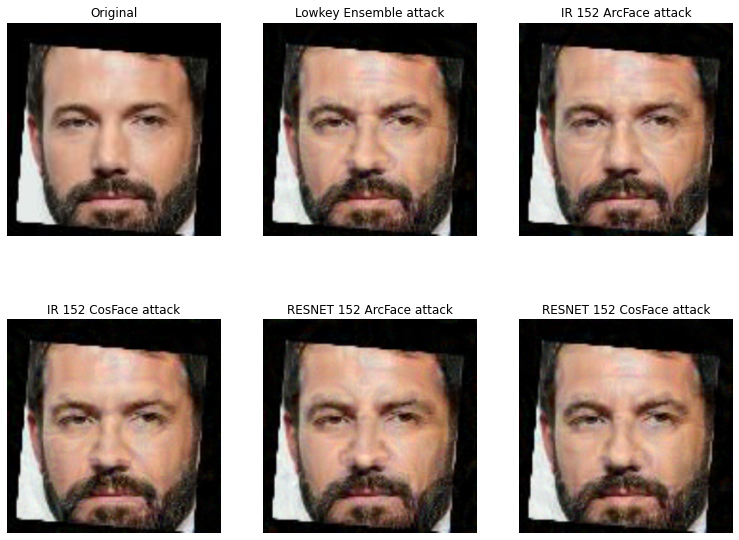

In [ ]:
# setting values to rows and column variables
%matplotlib inline
rows = 2
columns = 3
pic = 27

# create figure
fig = plt.figure(figsize=(13, 10))
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
inputs1 = Clean_img_py
# showing image
plt.imshow(inputs1)
plt.axis('off')
plt.title("Original")


# Adds a subplot at the 2st position
fig.add_subplot(rows, columns, 2)
inputs2 =ensemble_attack_img_py

# showing image
plt.imshow(inputs2)
plt.axis('off')
plt.title("Lowkey Ensemble attack")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
inputs3 =IR_152A_attack_img_py

# showing image
plt.imshow(inputs3)
plt.axis('off')
plt.title("IR 152 ArcFace attack")


# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
inputs4 =IR_152C_attack_img_py

# showing image
plt.imshow(inputs4)
plt.axis('off')
plt.title("IR 152 CosFace attack")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
inputs5 =RESNET_152A_attack_img_py

# showing image
plt.imshow(inputs5)
plt.axis('off')
plt.title("RESNET 152 ArcFace attack")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 6)
inputs6 =RESNET_152C_attack_img_py

# showing image
plt.imshow(inputs6)
plt.axis('off')
plt.title("RESNET 152 CosFace attack")



